# Kaggle competition : Titanic dataset

In this notebook, we will try to detect relevant patters among the passengers whose data is stored in the file **train.csv** to build a predictive model able to determine the survivability of the passengers whose data is stored in the file **test.csv**. 

## Problem characteristics

### Environment

This problem is self-sufficient : it is not a part of a larger environment, there is a single system to elaborate to solve it. The output data from the built model is the final result in the scope of this competition.

### Scope

The goal of this problem is to determine if the passengers listed in **test.csv** survived or not during the Titanic incident.

### Solution

Given the data about passengers listed in **train.csv** we are to build a predictive models. There are only two possible outputs : either the passenger survived, or he/she did not, thus this is a **binary classification problem**. The ground truth is contained within the **train.csv** file, so the learning process will be **supervised**. Finally, the provided data is the only data we will ever be able to feed to our model, since it was obtained from the specific incident of the Titanic. In that extent, the model will be learning on **batch** database.

### Performance measurement

The competition scores are based on **accuracy**, which corresponds to the percentage of correct predictions on **test.csv** from our system.

## Download files

Installing the Kaggle API :

In [1]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


Checking version. If version < 1.5.0, update with pip install kaggle --upgrade

In [2]:
!kaggle --version

Kaggle API 1.5.13


In [150]:
import os
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

"""
Creating variables for input data path and competition name
"""
INPUT_PATH = 'data'
OUTPUT_PATH = 'output'
COMPETITION = 'titanic'

"""
Function to download data into dedicated directory
"""
def fetch_input_data(competition=COMPETITION, input_path=INPUT_PATH, api=KaggleApi()):
    if not os.path.isdir(input_path):
        os.makedirs(input_path)
    api.authenticate()
    for file in api.competition_list_files(COMPETITION):
        api.competition_download_file(COMPETITION, str(file), path=INPUT_PATH)

"""
Function to submit a file
"""
def submit_predictions(file, competition=COMPETITION, api=KaggleApi()):
    api.authenticate()
    api.competition_submit(file_name=os.path.join(OUTPUT_PATH, file), message='Submission via API', competition=competition)

"""
Function to visualize predictions
"""
def check_predictions(competition=COMPETITION, api=KaggleApi()):
    api.authenticate()
    submissions = api.competitions_submissions_list(competition)
    for sub in submissions:
        print(f"Submission of the file {sub['fileName']} scored {sub['publicScore']}")

fetch_input_data()


gender_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)


## Data vizualisation

### Checking and loading data

In [4]:
"""
Import of useful packages
"""

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

"""
Printing data files stored in the folder 'data'. These files will be the input data for our model.
"""
for dirname, _, filenames in os.walk(INPUT_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


In [5]:
"""
Function loading training dataset 'train.csv'.
"""
def load_training_data(input_path = INPUT_PATH):
    csv_path = os.path.join(input_path, 'train.csv')
    return pd.read_csv(csv_path)

In [6]:
"""
Function loading test dataset 'test.csv'.
"""
def load_test_data(input_path = INPUT_PATH):
    csv_path = os.path.join(input_path, 'test.csv')
    return pd.read_csv(csv_path)

In [7]:
"""
Actual data loading 
"""
train_data = load_training_data()
test_data = load_test_data()

### First elements of data vizualisation

Display 5 first rows :

In [8]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display short description of data :

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This dataset contains 891 examples and 12 features. At most 204 examples have only non-null values. 3 features have null values : Age, Cabin and Embarked. There are 7 numerical features (of which 5 are integers), and 5 are strings.

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In the test dataset, there is also 1 null value for fare.

Display number of categories for every non-float feature :

In [11]:
for col in train_data.select_dtypes(include=['int64', 'object']):
    print(col, train_data[col].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
SibSp 7
Parch 7
Ticket 681
Cabin 147
Embarked 3


The features PassengerId, Name, Ticket and Cabin have a large number of categories. The values are either unique to each passenger (PassengerId, Name) or to each family (Ticket, Cabin). Now we will display the value counts for the remaining 6 categories :

In [12]:
print(train_data['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


This feature corresponds to our label. As we mentioned in the introduction of this notebook, this is a binary feature :
 - 0: did not survive
 - 1: survived

In [13]:
print(train_data['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


There are 3 ticket classes. The majority of them is of 3rd class.

In [14]:
print(train_data['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


Gender distribution in the boat. Majority is male. This feature is probably of high importance regarding the number of surviving passengers, given the rule of "women and children first" was applied during the evacuation.

In [15]:
print(train_data['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Number of siblings and spouse on the boat. Most people went with no sibling/spouse, but there are some big families as well. Could be interesting to transform into a binary or ternary categorical feature.

In [16]:
print(train_data['Parch'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


This feature has kind of the same distribution as the previous one. It represents the number of parents or children on the boat. Might be interesting to regroup with SibSp.

In [17]:
print(train_data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Port of embarcation. Most of passengers embarked in Southampton.

Below we examine numerical feature, by giving some statistical information :

In [18]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - PassengerId is simply a number from 1 to 891 given to each passenger. 
 - Survived is our target variable. From this we can see that 38.4 % of passengers survived. 
 - From Pclass we confirm that most of the passengers were in 3rd class. 
 - From Age, we can see that people are quite young on the ship. There are also probably some outliers (older people). 
 - From SibSp and Parch, we see that a vast majority of passengers went without any siblings of parents. 
 - From Fare, we can see that most of the tickets are priced under $31, but that some people paid relatively very expensive price for this trip. There should be a correlation between Fare and Pclass.

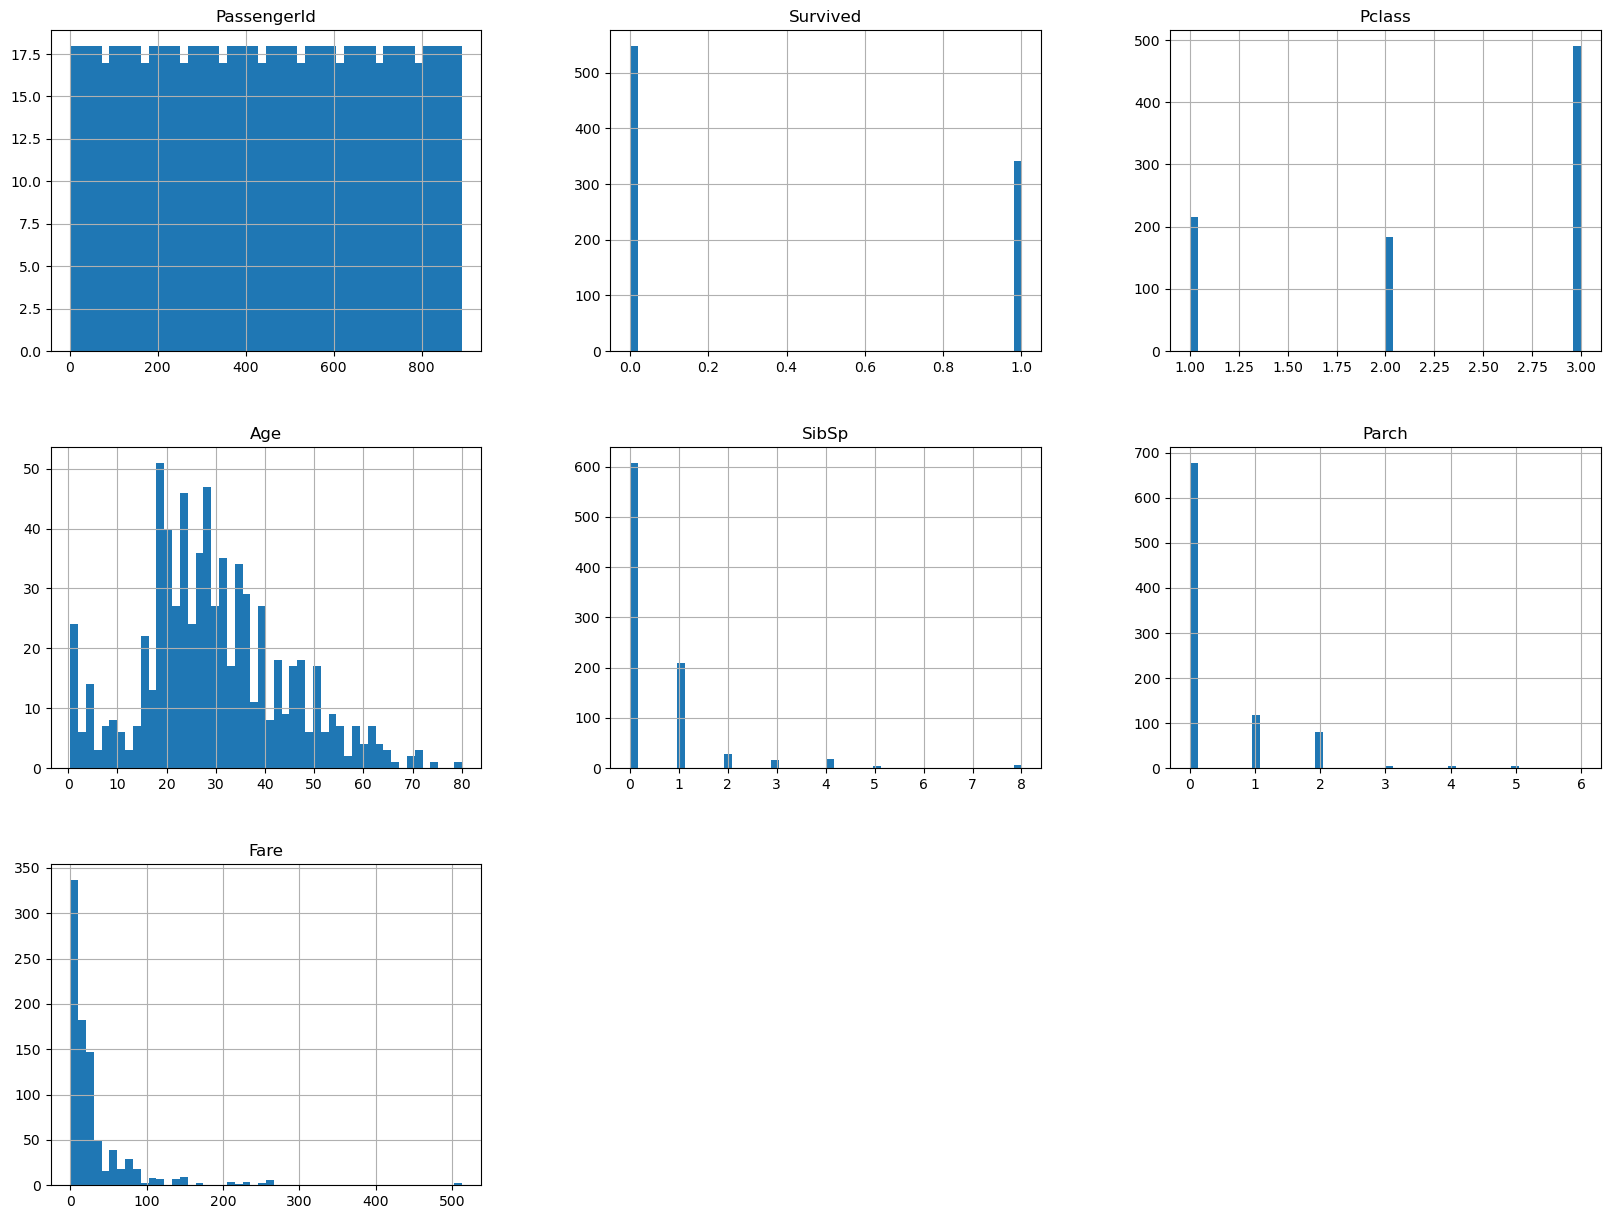

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

 - Attributes are not all on the same scale, we will have to perform standardization.
 - Histograms are mostly asymmetric and only Age could be considered as a normal distribution (although it is skewed).

## Bi-variate analysis

But first, we need to change some of the features into categorical ones, such as Age and Fare. We first need to determine the best categories for them, regarding the survival rate. We will have to work on both full train set and also test set : if we add new features or transform some, we will need to do this also on the test set.

### Age feature

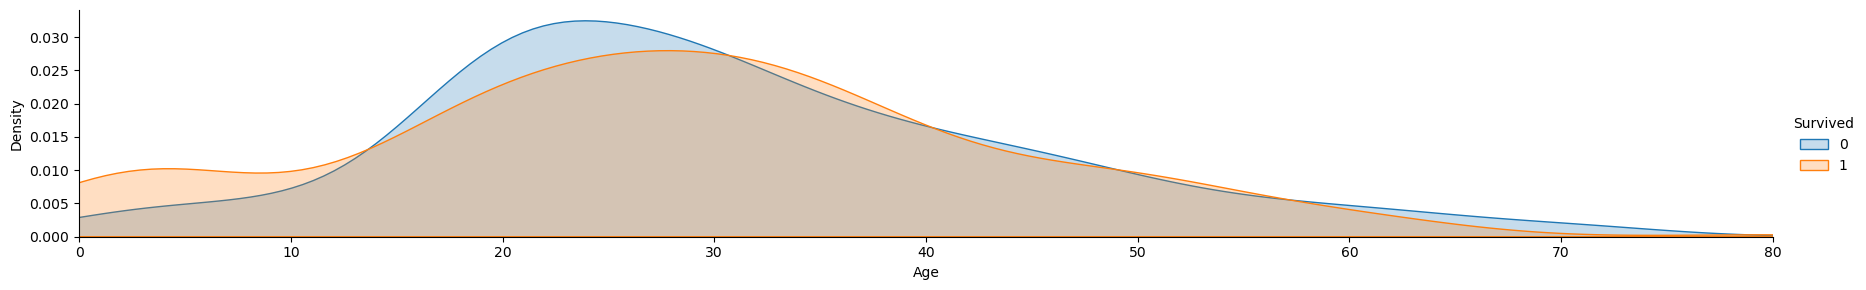

In [20]:
import seaborn as sns
a = sns.FacetGrid(train_data, hue = 'Survived', aspect = 6)
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim=(0, train_data['Age'].max()))
a.add_legend()

We will set the categories to : 0-14 / 14-30 / 30-40 / 40-50 / 50-60 / 60-80 from 0 to 5. We will also replace the null values by the age average + some noise :

In [21]:
full_data = [train_data, test_data]
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(
        age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

    dataset.loc[dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 4
    dataset.loc[dataset['Age'] > 60, 'Age'] = 5
train_data['Age'].value_counts()


1    437
2    209
3    103
0     78
4     42
5     22
Name: Age, dtype: int64

In [22]:
train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.576923
2,2,0.435407
4,4,0.404762
3,3,0.349515
1,1,0.338673
5,5,0.227273


### Fare feature

First, replace the null value by median of Fare column. We choose the median because the distribution is very skewed to the left.

In [23]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train_data['Fare'].median())

Text(100, 200, 'Skewness : 3.86')

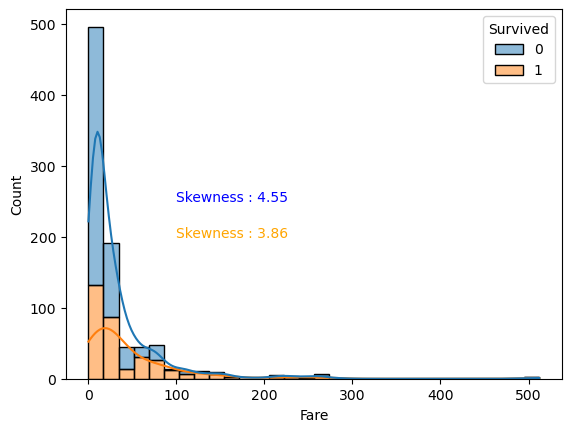

In [24]:
g = sns.histplot(data=train_data, x='Fare', legend=True, kde=True, hue='Survived', bins=30, multiple='stack')
g.annotate('Skewness : %.2f'%(train_data[train_data['Survived']==0]['Fare'].skew()), xy=(100, 250), color='b')
g.annotate('Skewness : %.2f'%(train_data[train_data['Survived']==1]['Fare'].skew()), xy=(100, 200), color='orange')

Text(100, 100, 'Skewness : 3.69')

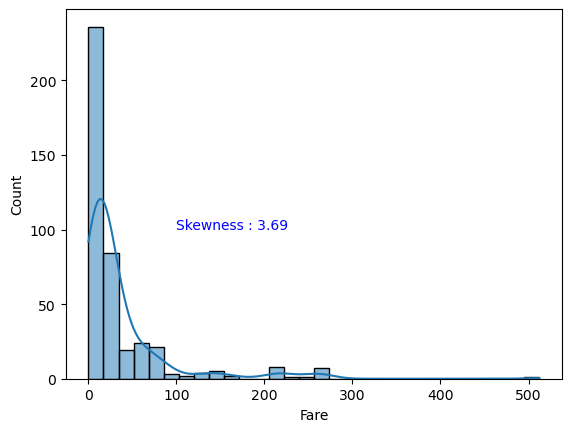

In [25]:
g = sns.histplot(data=test_data, x='Fare', legend=True, kde=True, bins=30, multiple='stack')
g.annotate('Skewness : %.2f'%(test_data['Fare'].skew()), xy=(100, 100), color='b')

In both train and test data, Fare is very skewed, so we will use a logarithm transformation to prevent the model from overweighting with high values.

In [26]:
for dataset in full_data:
    dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

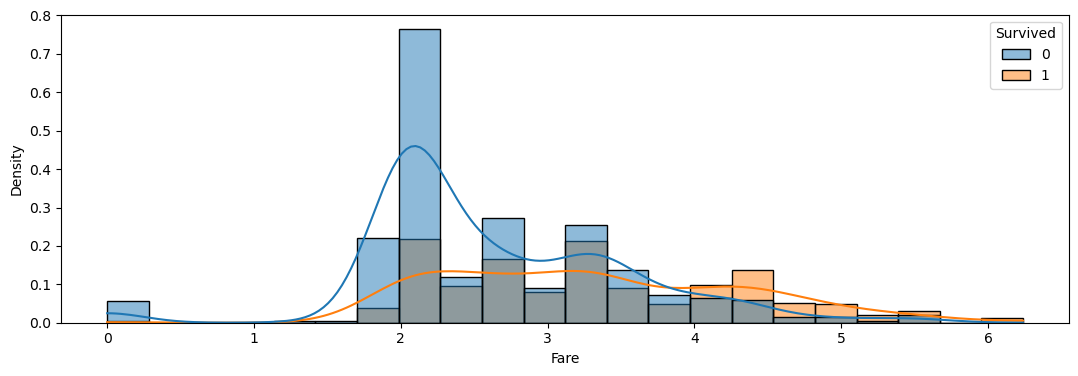

In [27]:
a4_dims = (13, 4)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.histplot(data=train_data, x='Fare', legend=True, hue='Survived', kde=True, stat='density')

We have two categories : when Fare < 3.9, we have lower survival rate, whereas it is the opposite when Fare > 3.9.

In [28]:
for dataset in full_data:
    dataset.loc[dataset['Fare'] <= 3.9, 'Fare'] = 0
    dataset.loc[dataset['Fare'] > 3.9, 'Fare'] = 1
train_data['Fare'].value_counts()
train_data['Fare'] = train_data['Fare'].astype(int)

In [29]:
train_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Fare,Survived
1,1,0.676829
0,0,0.317744


Now that we have categorized the Fare and Age features, we will go through each feature of the dataset to figure out possible modifications or combinations.

### Cabin feature

For the cabin feature, we noted earlier that there were a lot of missing values. This probably corresponds to passengers who did not have a personnal cabin, which may be an indicator of wellness. We will first categorize the feature into a binary variable : 0 - no cabin / 1 - cabin.

In [30]:
for dataset in full_data:
    dataset['Has_cabin'] = dataset["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [31]:
train_data[["Has_cabin", "Survived"]].groupby(['Has_cabin'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Has_cabin,Survived
1,1,0.666667
0,0,0.299854


We have almost the same survival rates as the categorized Fare feature. We will examine whether these two features are redundant or not (i.e. whether the passengers who have a cabin are the same who paid a high fare).

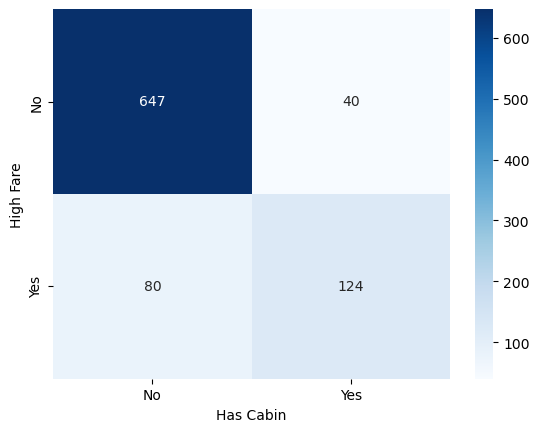

In [32]:
from sklearn.metrics import confusion_matrix
labels = ['No', 'Yes']
sns.heatmap(confusion_matrix(train_data['Has_cabin'], train_data['Fare']), annot=True, fmt='g', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.ylabel('High Fare')
plt.xlabel('Has Cabin')
plt.show()

The two features are strongly correlated, but not enough to get rid of one of them for now : almost 40% of passengers categorized in High Fare don't have a cabin. We will consider it as a potential way of improvement for our model.

### Siblings and parents features

These two features can be regrouped in a new feature Family_size = 1 + SibSp + Parch.

In [33]:
for dataset in full_data:
    dataset['Family_size'] = dataset['SibSp'] + dataset['Parch'] + 1
train_data['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

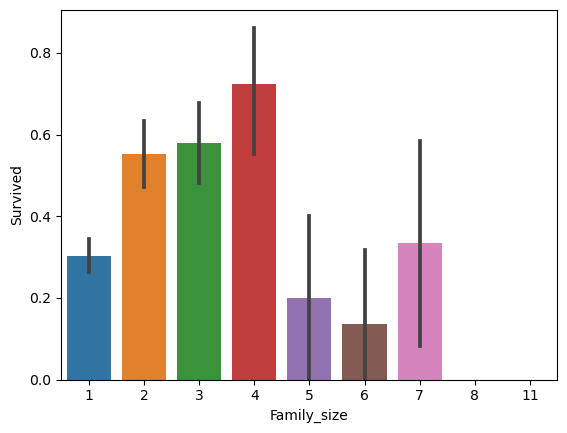

In [34]:
sns.barplot(x='Family_size', y='Survived', data=train_data)

The survival rate greatly increases for those who are part of a family, until the value of 5 members. But we can also notice that higher values of family size have a wider error bar, due to their little proportion in the dataset. Let's try to categorize this attribute in 3 groups : 
0 : 1 member / 1 : 2 to 3 members / 2 : 4+ members.

In [35]:
for dataset in full_data:
    dataset.loc[dataset['Family_size'] <= 1, 'Family_size'] = 0
    dataset.loc[(dataset['Family_size'] > 1) & (dataset['Family_size'] <= 3), 'Family_size'] = 1
    dataset.loc[dataset['Family_size'] > 3, 'Family_size'] = 2
train_data['Family_size'].value_counts()

0    537
1    263
2     91
Name: Family_size, dtype: int64

In [36]:
train_data[['Family_size', 'Survived']].groupby(['Family_size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_size,Survived
1,1,0.562738
2,2,0.340659
0,0,0.303538


<AxesSubplot:xlabel='Family_size', ylabel='Survived'>

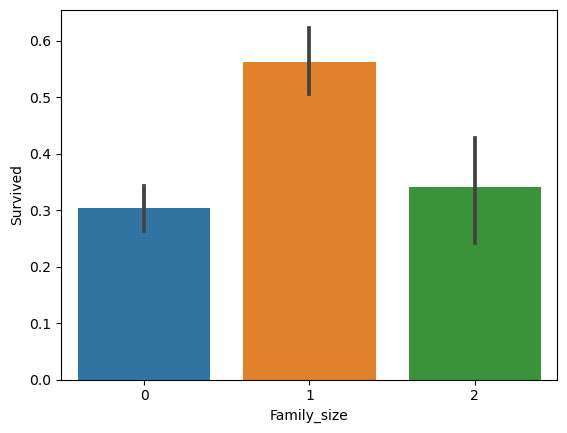

In [37]:
sns.barplot(x='Family_size', y='Survived', data=train_data)

It seems that families of moderate size survive better than alone people and large families.

### Embarked feature

In [38]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

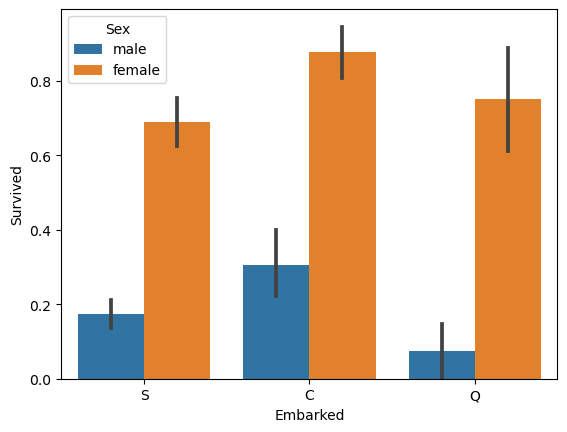

In [40]:
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train_data)

Passengers who embarked in Cherbourg have a higher surival rate. We might want to merge the Southampton and Queenstown categories into one. But we will now check if there is a correlation between port of embarkment and Pclass :

In [41]:
train_data[['Embarked', 'Pclass']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Embarked,Pclass
1,Q,2.909091
2,S,2.350932
0,C,1.886905


There are strong differences in average passenger class when we consider the three ports. The passengers embarked in Cherbourg port are on average 1 class higher than those of Queenstown, and halfway between these two we have Southampton port. While Cherbourg has a significantly higher survival rate than the two others, there is no big difference between Southampton and Queenstown even though the passengers class differs a lot. We will keep this feature as it is, while replacing missing values with the most abundant category (Southampton) and encode the categories.  

In [42]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

### Pclass feature

In [43]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [44]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The passenger class has a strong impact on their chance of survival. We will examine the correlation between Pclass and other variables :

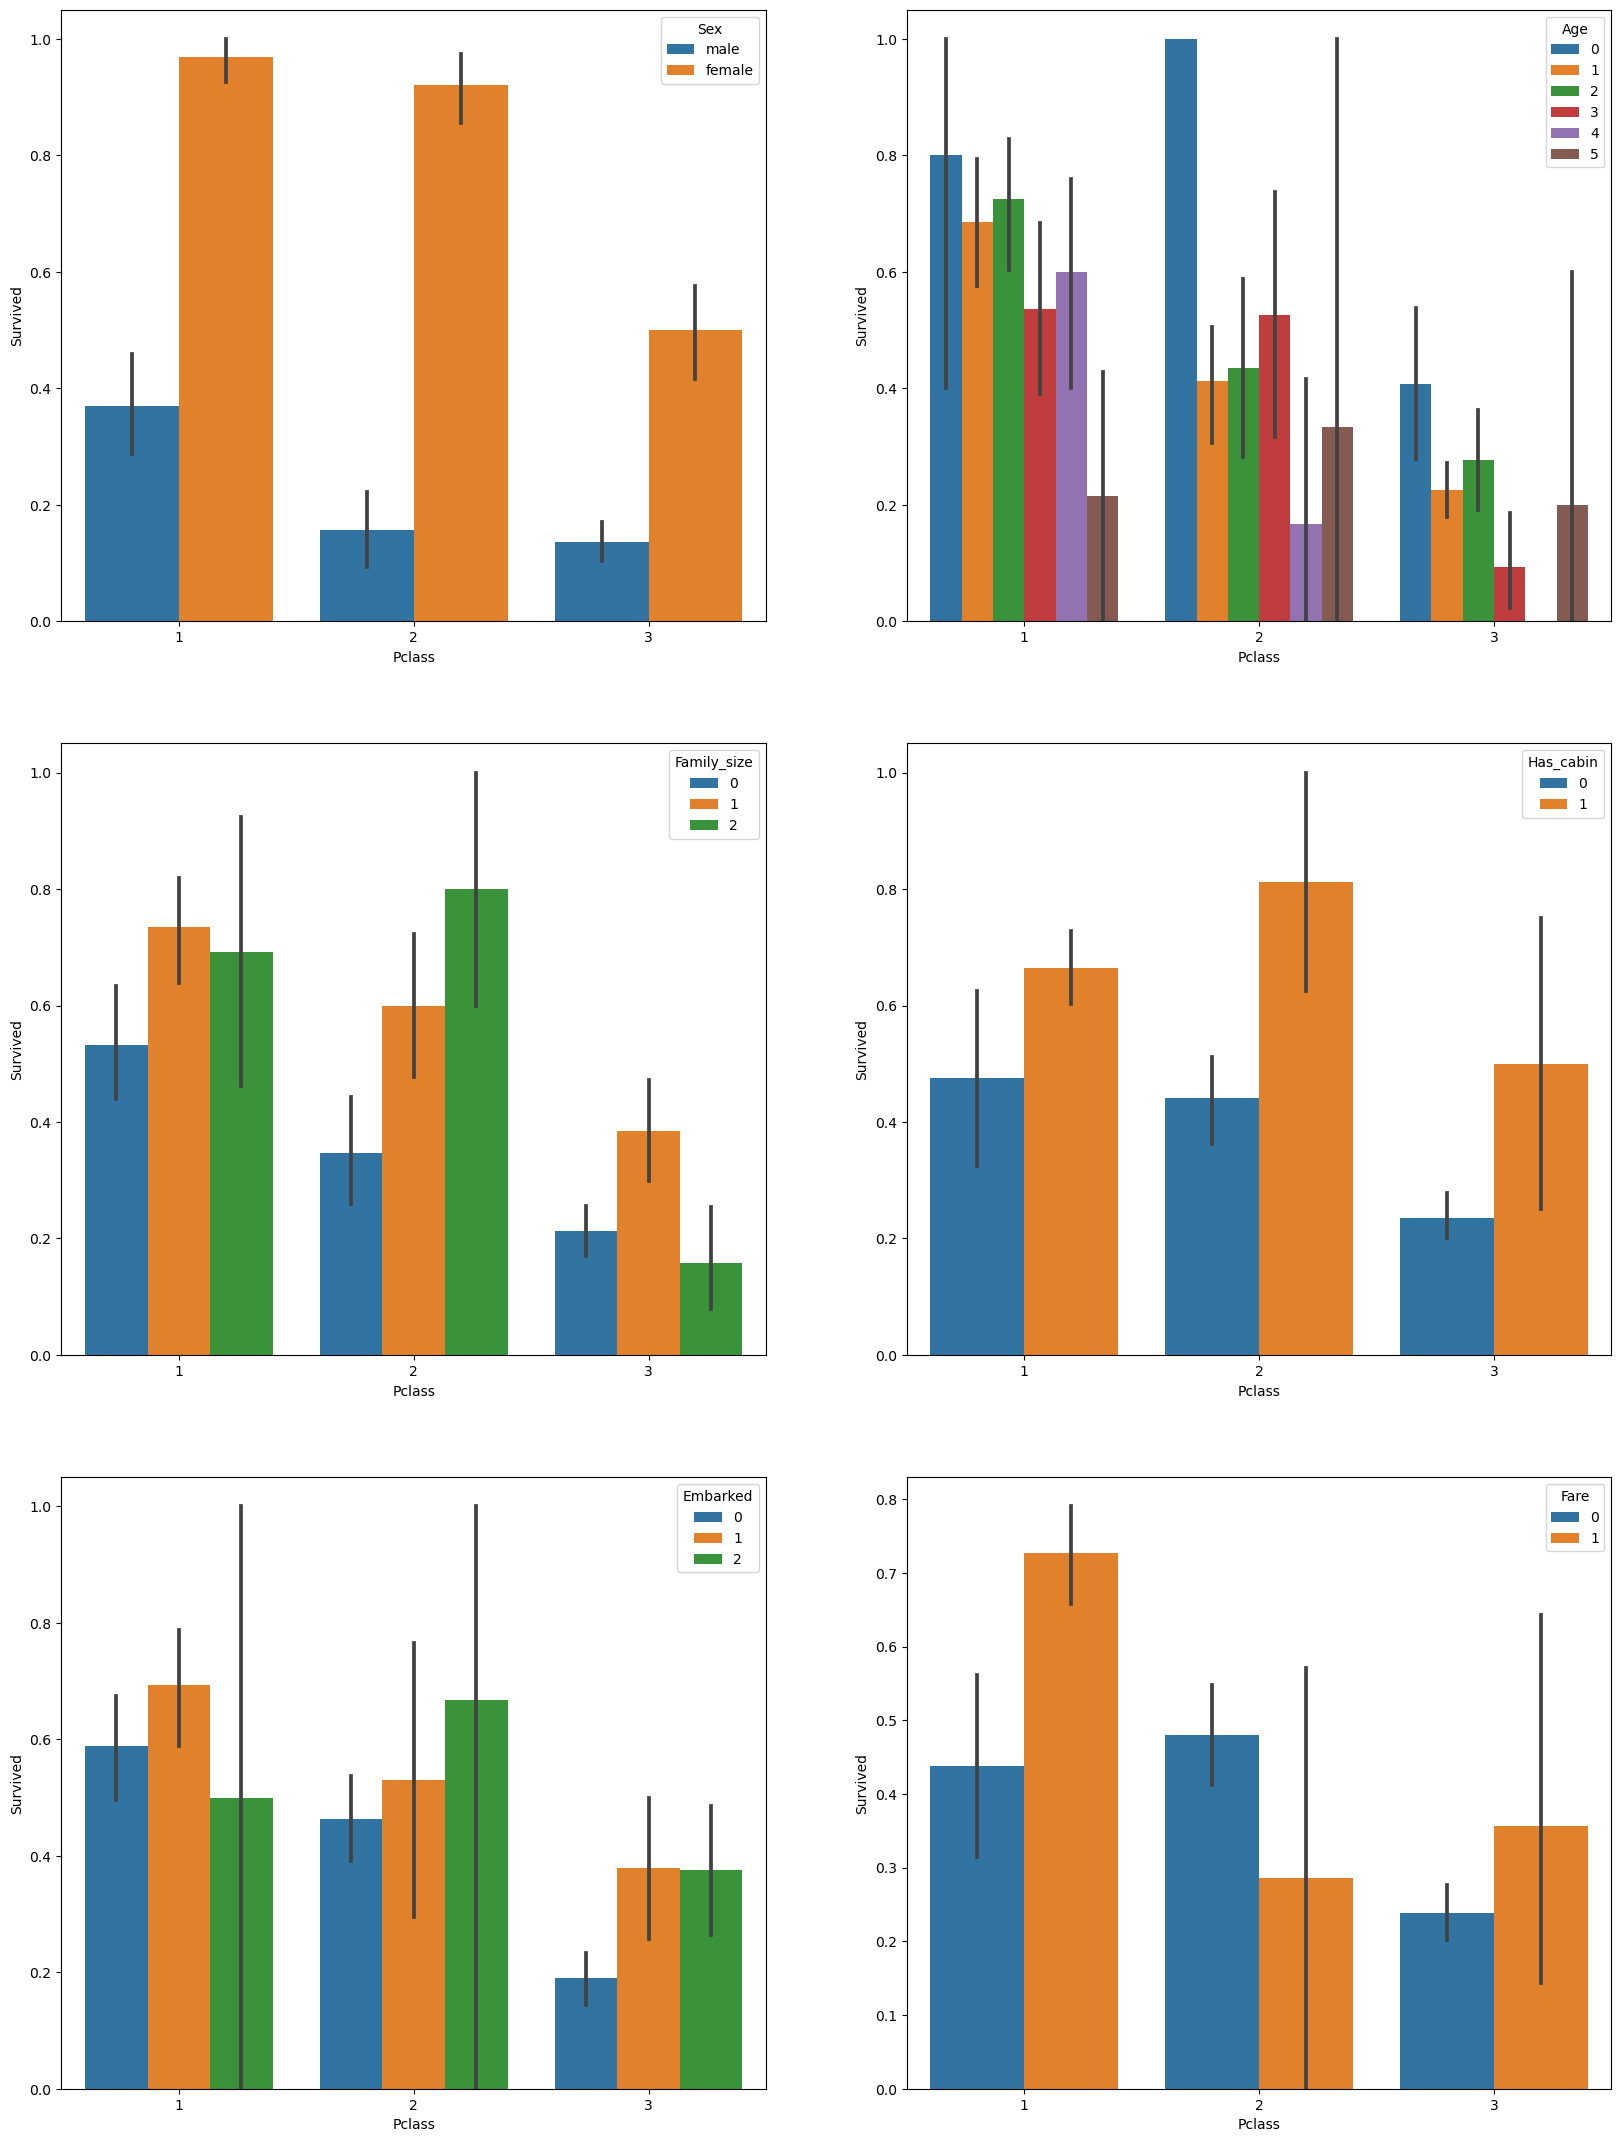

In [45]:
fig, ((axis1,axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3,2,figsize=(20,27))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data, ax = axis1)
sns.barplot(x='Pclass', y='Survived', hue='Age', data=train_data, ax = axis2)
sns.barplot(x='Pclass', y='Survived', hue='Family_size', data=train_data, ax = axis3)
sns.barplot(x='Pclass', y='Survived', hue='Has_cabin', data=train_data, ax = axis4)
sns.barplot(x='Pclass', y='Survived', hue='Embarked', data=train_data, ax=axis5)
sns.barplot(x='Pclass', y='Survived', hue='Fare', data=train_data, ax=axis6)
plt.show()

Some observations for creating composed features :
 - **Women are advantaged in any case, but it is particularly penalized for a woman to be in third class (survival rate is halved), whereas it is particularly beneficial to men to be in first class (survival rate is doubled).**
 - Class passenger does not change much the age hierarchy towards survival. There are a few difference but we have to keep in mind that the dataset is not large, therefore we cannot draw very certain conclusions.
 - Being in 1st or 2nd class is very beneficial to large families (but they are very few), as theire chance of survival drops under 20% in 3rd class. For the rest of the family types, their hierarchy is maintained in every class.
 - The class has no impact on the hierarchy between those who have a cabin and those who do not. Having a cabin is an advantage in every situation regarding class, though it is less pronounced in 1st class.
 - The hierarchy in class is modified when passengers embarked from Queenstown. But we have to remember that most of them are in third class, hence there is very few passengers from Queenstown in classes 1 and 2, which makes this information not reliable.
 - **Having paid a high fare makes a huge difference in 1st class. Actually, being in 1st class without having paid a high fare is not so beneficial, since the survival rate is around 44% (against 38% in total). In 2nd and 3rd class, the sample is too small to get reliable information.**

### Ticket Feature

In [46]:
train_data['Ticket'].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

We can assert that there are two types of ticket ID : alphanumeric and numeric-only IDs. We will categorize it with 0: numeric and 1: alphanumeric.

In [47]:
import re

def is_numeric(characters):
    return bool(re.match('^[0-9]+$', characters))

train_data['Ticket'] = train_data['Ticket'].apply(lambda ticket: 0 if is_numeric(ticket) else 1)

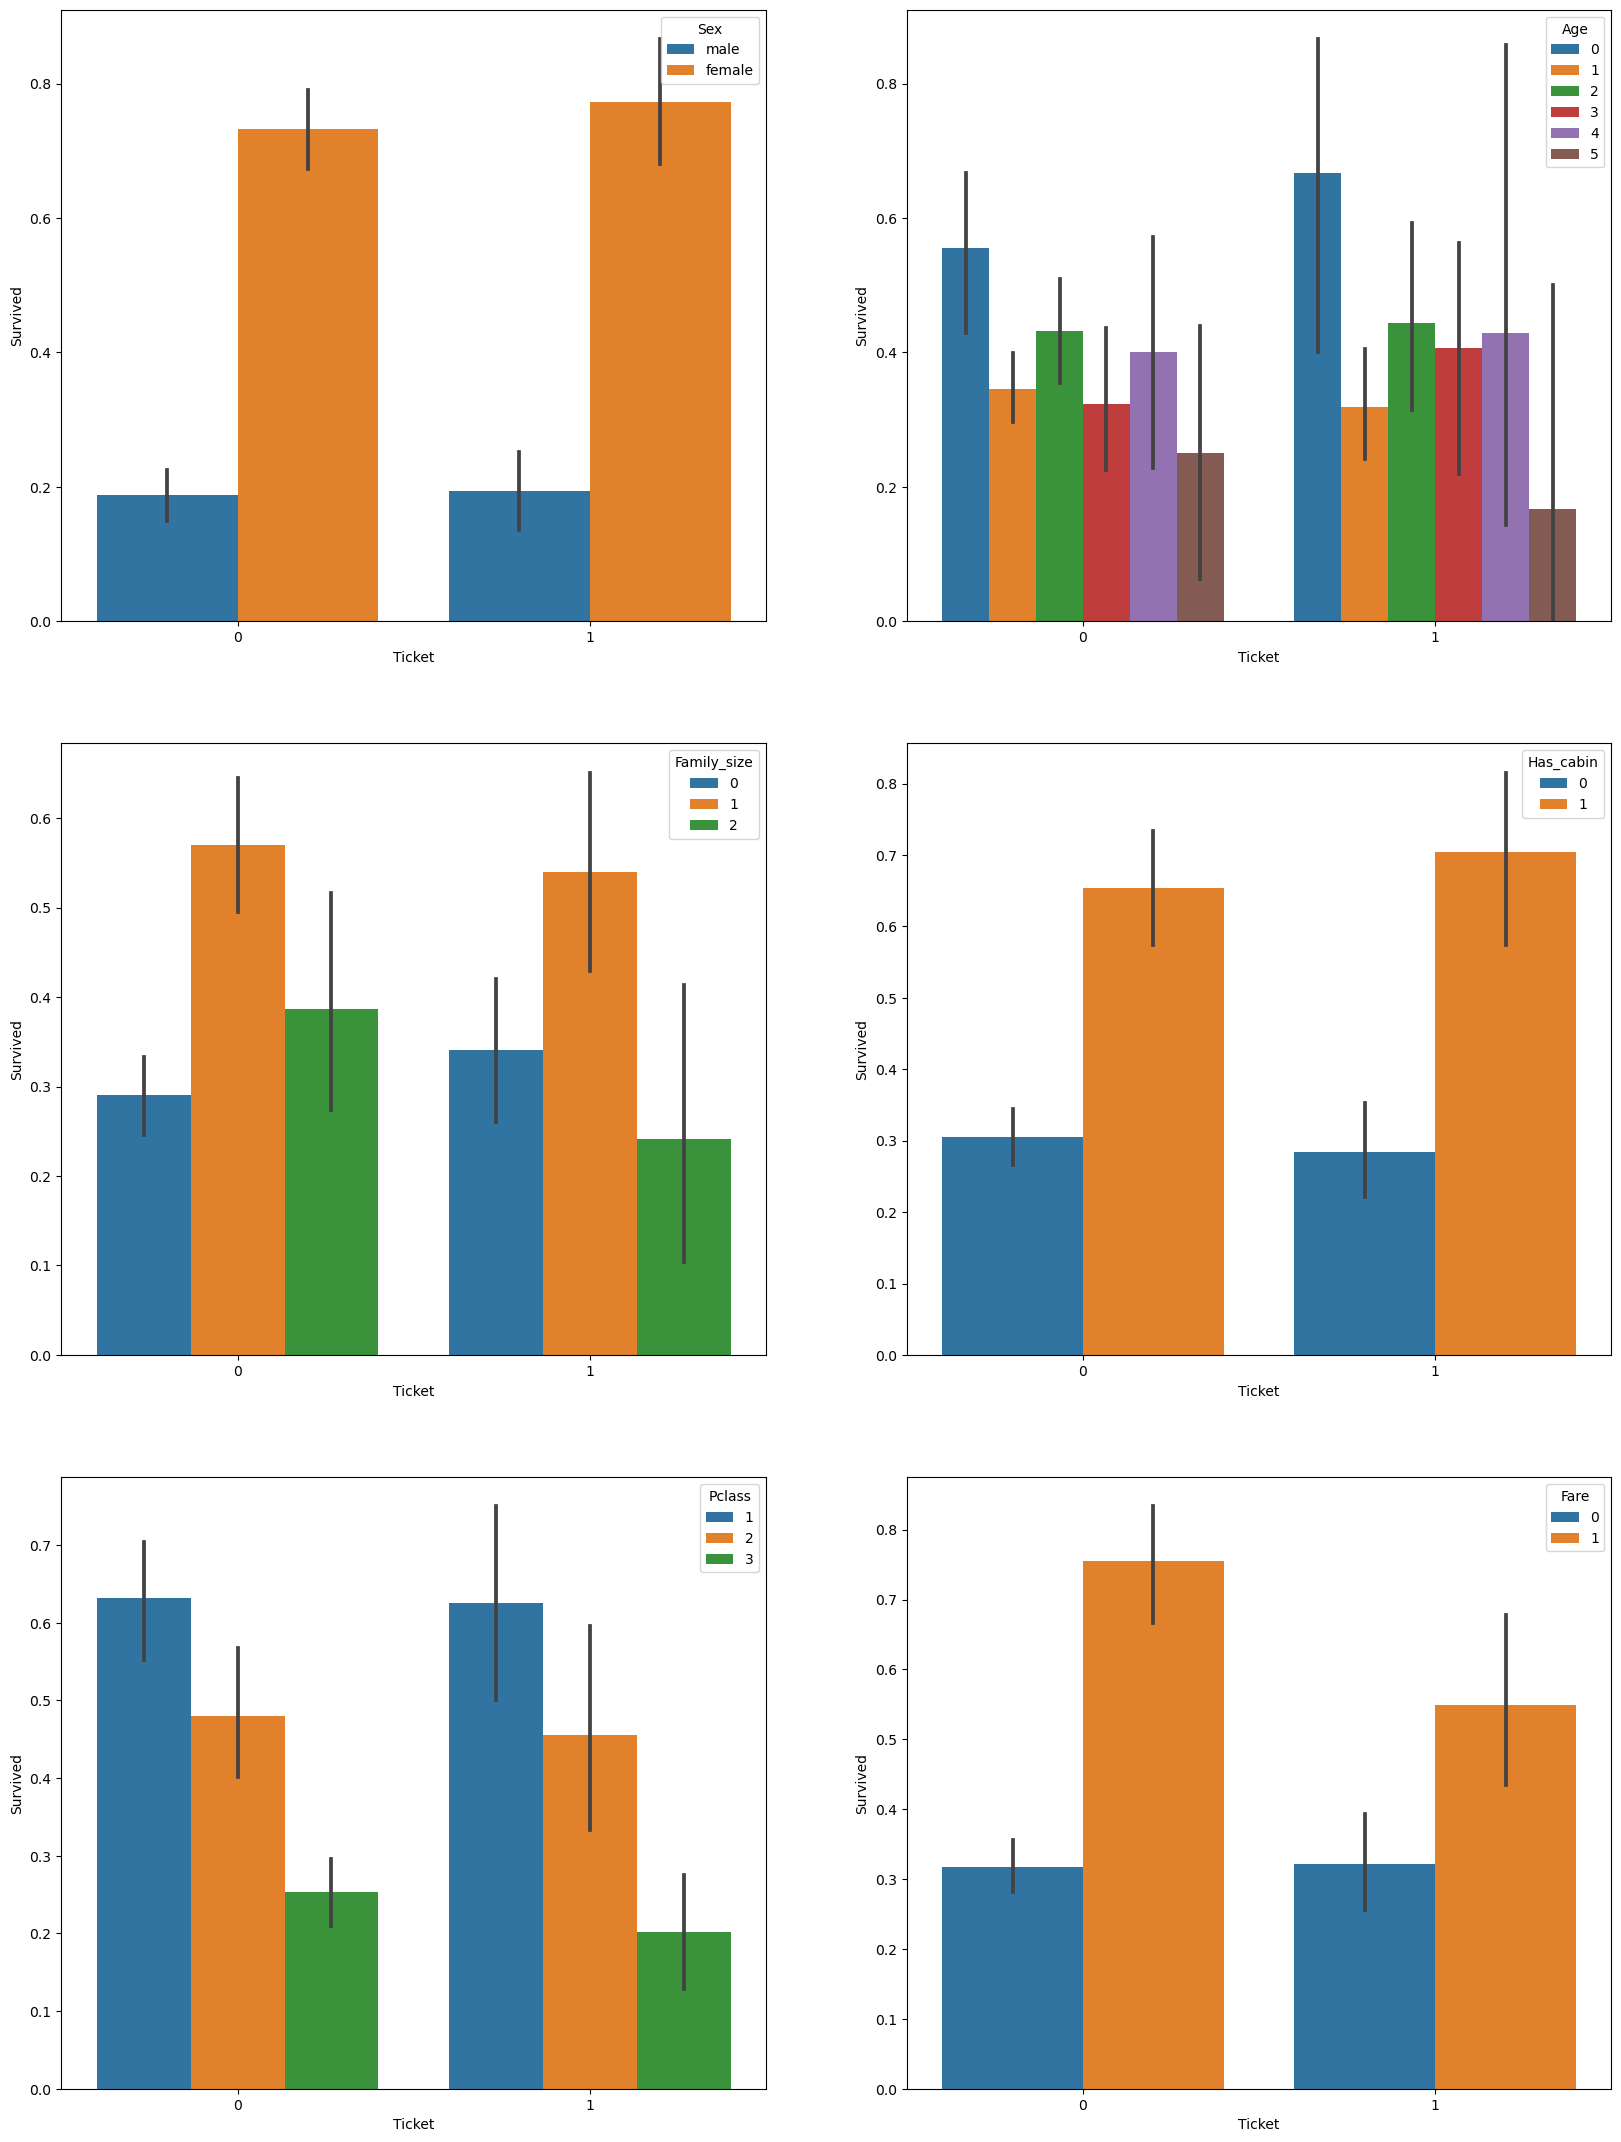

In [48]:
fig, ((axis1,axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3,2,figsize=(20,27))
sns.barplot(x='Ticket', y='Survived', hue='Sex', data=train_data, ax = axis1)
sns.barplot(x='Ticket', y='Survived', hue='Age', data=train_data, ax = axis2)
sns.barplot(x='Ticket', y='Survived', hue='Family_size', data=train_data, ax = axis3)
sns.barplot(x='Ticket', y='Survived', hue='Has_cabin', data=train_data, ax = axis4)
sns.barplot(x='Ticket', y='Survived', hue='Pclass', data=train_data, ax=axis5)
sns.barplot(x='Ticket', y='Survived', hue='Fare', data=train_data, ax=axis6)
plt.show()

This new feature does not appear to have an influence on survival rate in general, nor does it change the hierarchies of any other feature. We will drop it.

### Sex feature

In [49]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We already know that sex is alone already a good predictor for survival rate. We might get fresh insights if we look at its correlation to other features. 

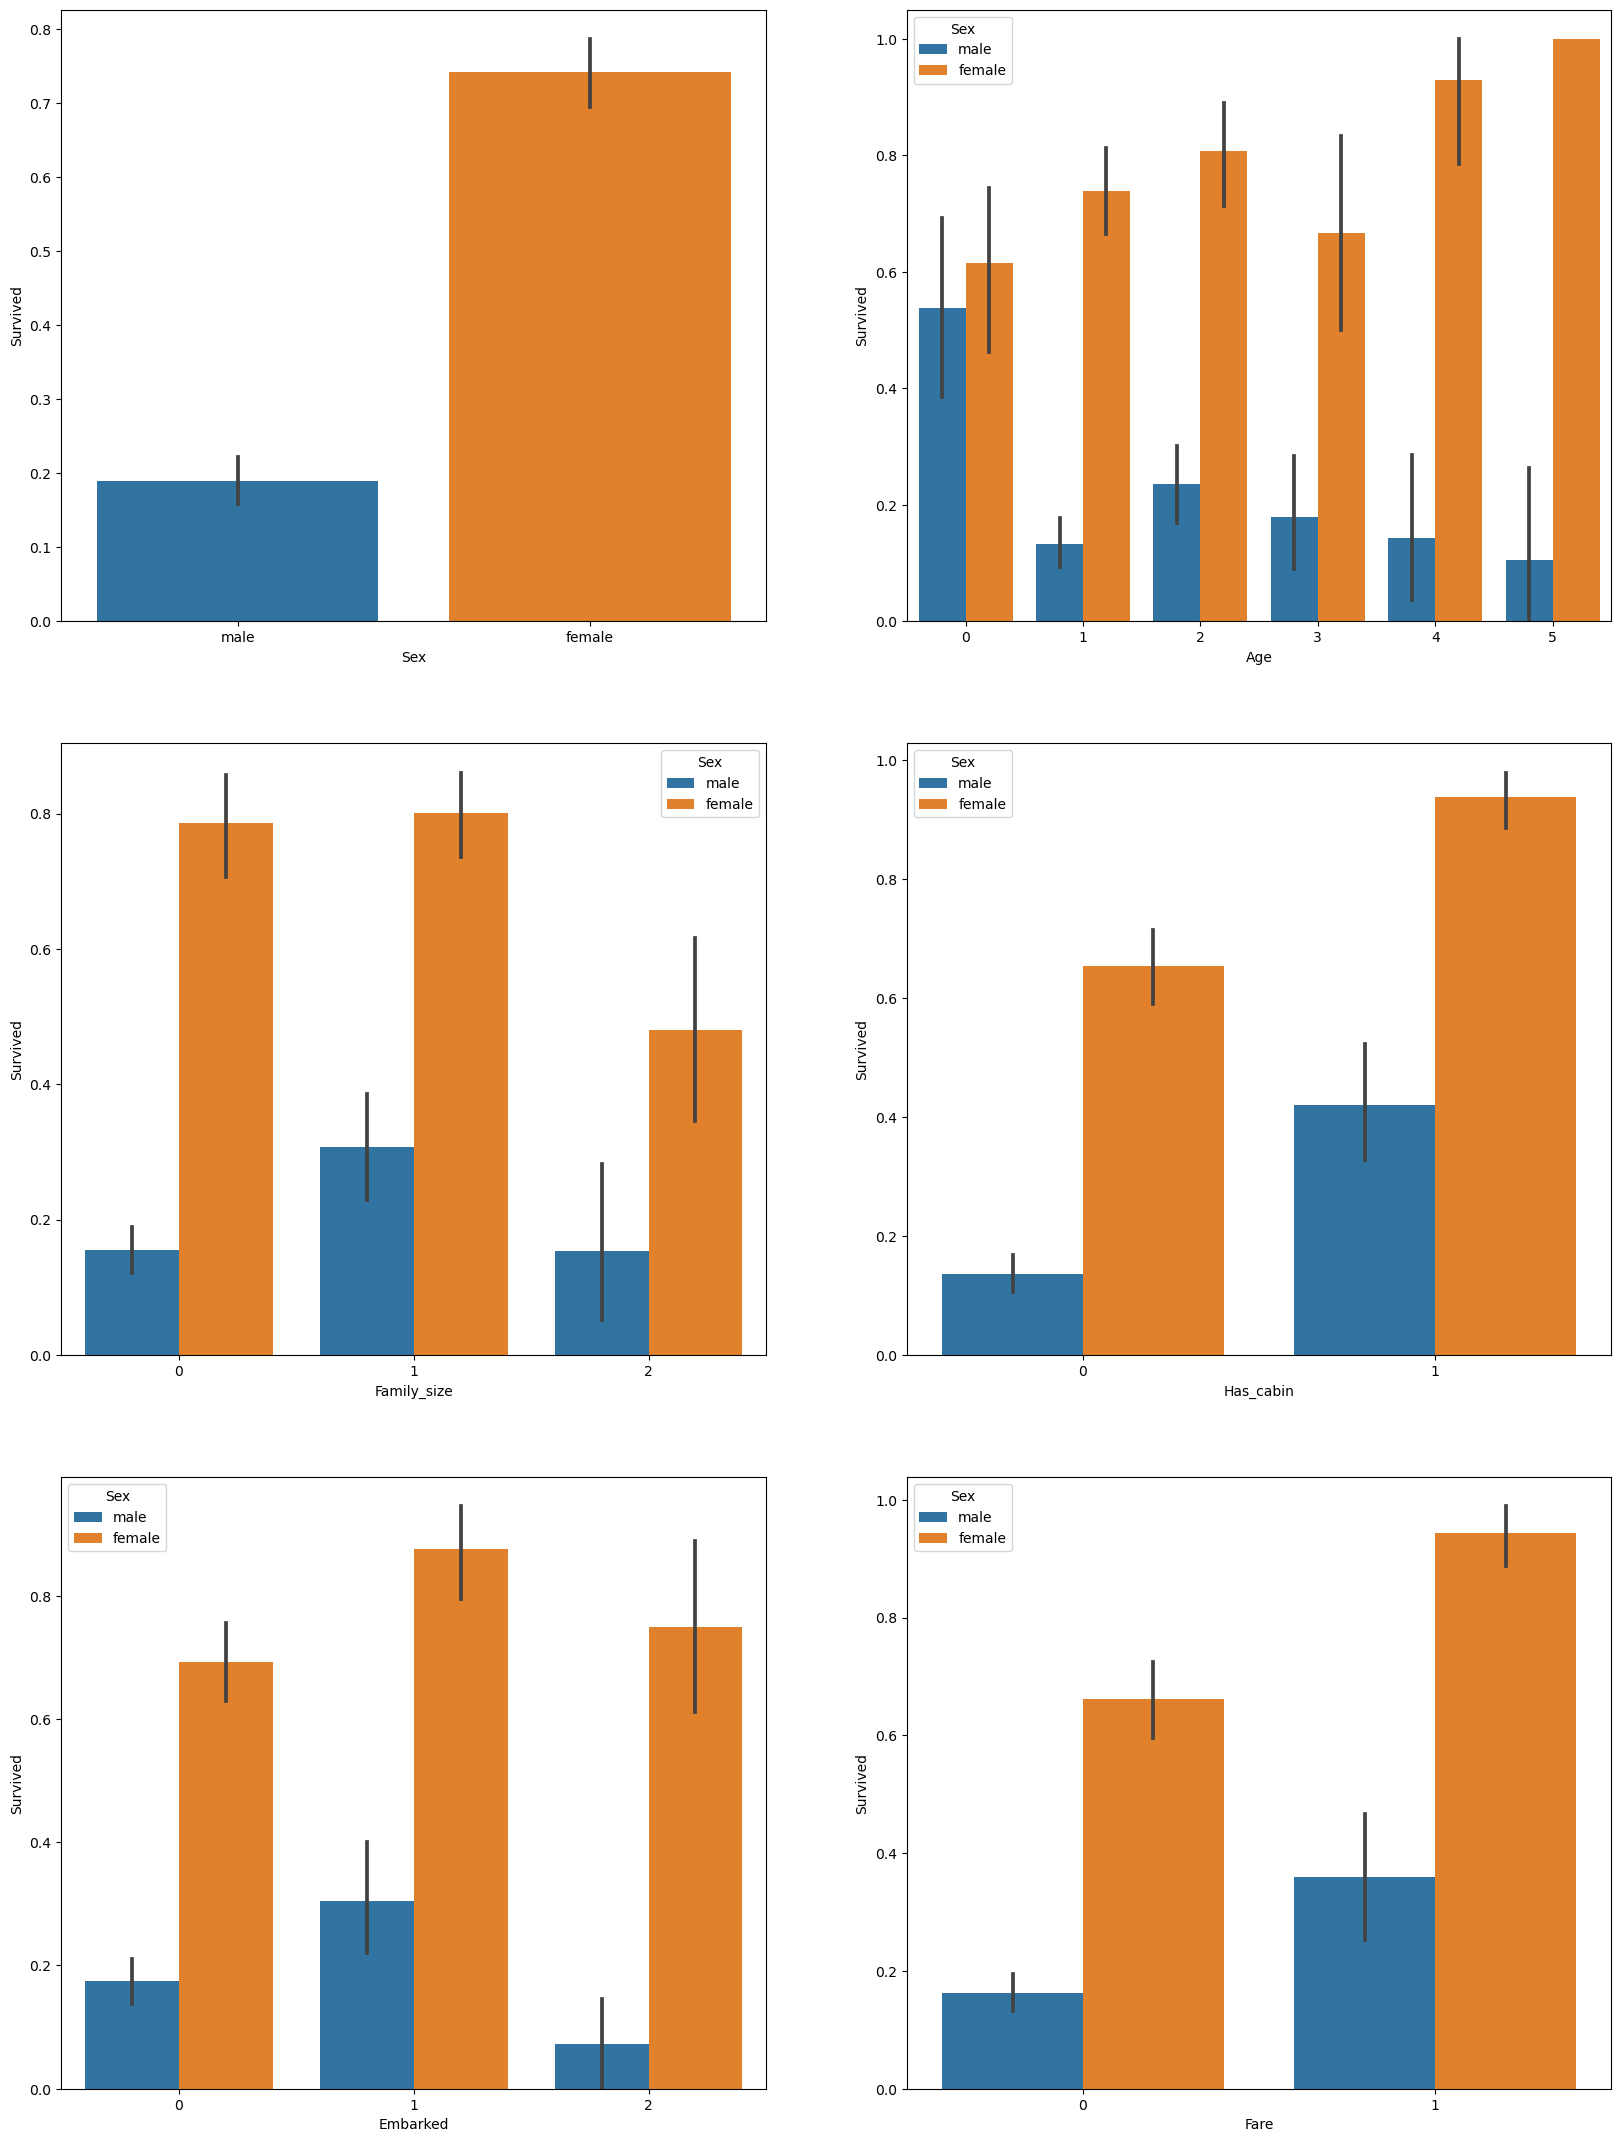

In [50]:
fig, ((axis1,axis2), (axis3, axis4), (axis5, axis6)) = plt.subplots(3,2,figsize=(20,27))
sns.barplot(x='Sex', y='Survived', data=train_data, ax = axis1)
sns.barplot(x='Age', y='Survived', hue='Sex', data=train_data, ax = axis2)
sns.barplot(x='Family_size', y='Survived', hue='Sex', data=train_data, ax = axis3)
sns.barplot(x='Has_cabin', y='Survived', hue='Sex', data=train_data, ax = axis4)
sns.barplot(x='Embarked', y='Survived', hue='Sex', data=train_data, ax=axis5)
sns.barplot(x='Fare', y='Survived', hue='Sex', data=train_data, ax = axis6)
plt.show()

Two interesting things appear :
 - Being under 14 years old is the only case where men have a high survival rate.
 - Being part of a large family is the only case here women have a low survival rate.

In [51]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1} ).astype(int)

### Name feature

In [52]:
train_data['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

We can observe that there are a diversity of titles written in the string representing the name. It might be interesting to draw categories from passengers' title.

In [53]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
 # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
# Create a new feature Title, containing the titles of passenger names
    dataset['Title'] = dataset['Name'].apply(get_title)

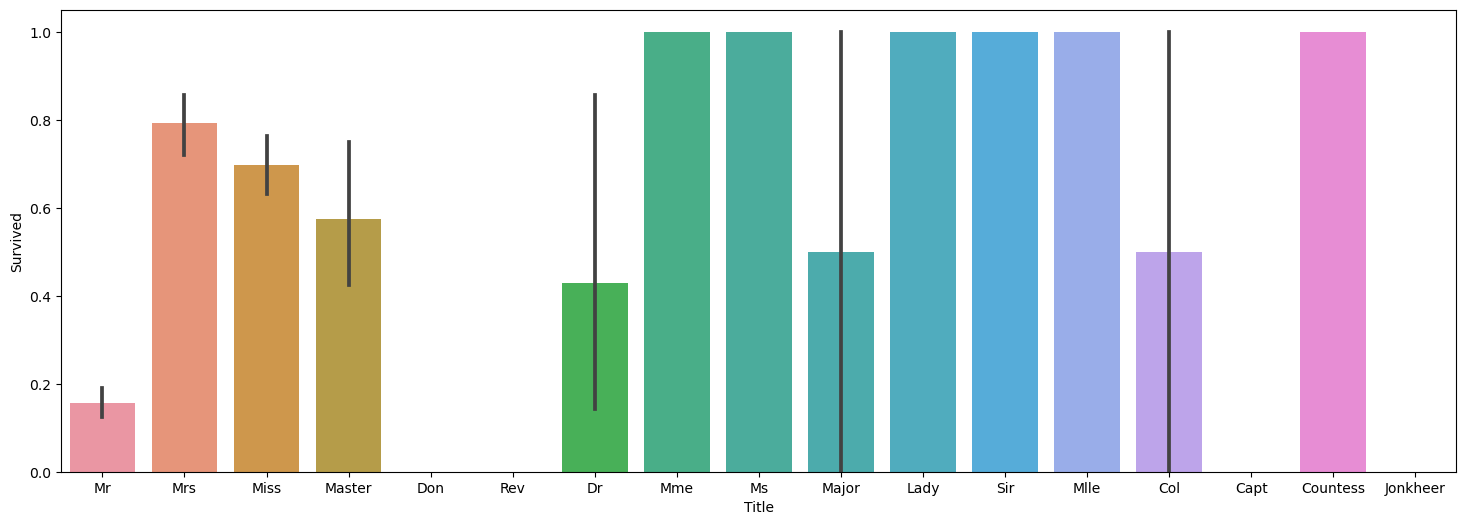

In [54]:
fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y="Survived", data=train_data, ax=axis1);

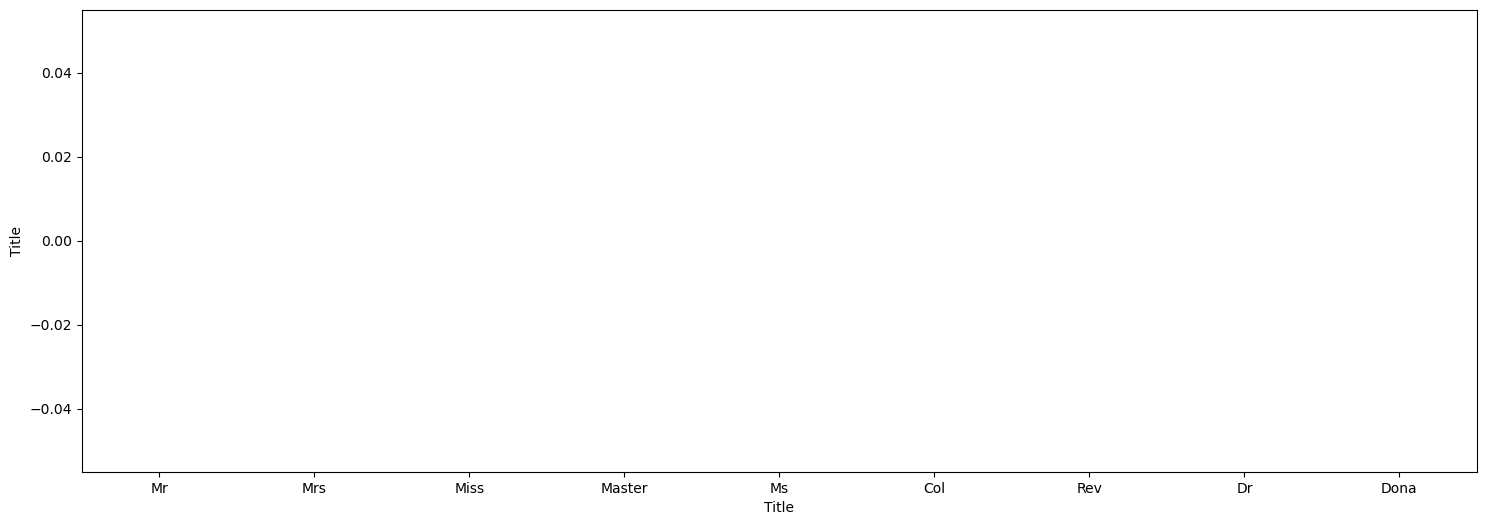

In [55]:
fig, (axis1) = plt.subplots(1,figsize=(18,6))
sns.barplot(x="Title", y=test_data['Title'].value_counts(), data=test_data, ax=axis1);

List of categories :
 - 0: Don, Rev, Capt, Jonkheer (0% survival rate)
 - 1: Mr (20%)
 - 2: Dr, Major, Col (40%)
 - 3: Master (60%)
 - 4: Mrs, Miss (70%)
 - 5: Mme, Ms Title, Lady, Sir, Mlle, Countess (100%)

There is another title in the test data : 'Dona'. We will assimilate it in the same category as 'Don', since the title is similar and we don't have any information on the survival rate. Either way, it concerns only 1 person, so it should not affect the results drastically.

In [56]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Don', 'Rev', 'Capt', 'Jonkheer', 'Dona'], 0)
    dataset['Title'] = dataset['Title'].replace(['Mr'], 1)
    dataset['Title'] = dataset['Title'].replace(['Dr', 'Major', 'Col'], 2)
    dataset['Title'] = dataset['Title'].replace(['Master'], 3)
    dataset['Title'] = dataset['Title'].replace(['Mrs', 'Miss'], 4)
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Lady', 'Sir', 'Mlle', 'Countess'], 5)

In [57]:
train_data['Title'].value_counts()

1    517
4    307
3     40
2     11
0      9
5      7
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title', ylabel='Count'>

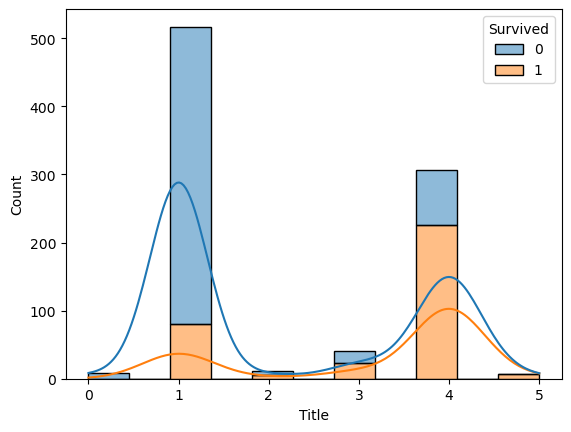

In [58]:
sns.histplot(x='Title', hue='Survived', data=train_data, kde=True, multiple='stack')

As a matter of fact, title is linked to sex, as the latter is expressed by the former. It is also probably correlated to Pclass and/or to Fare, as title may express a socio-economic category. We will further investigate this in multivariate analysis.

### Conclusion

In [59]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_cabin,Family_size,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1,1,0,1,0,NaN,0,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2,1,0,1,1,C85,1,1,1,4
2,3,1,3,"Heikkinen, Miss. Laina",1,1,0,0,1,0,NaN,0,0,0,4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2,1,0,0,1,C123,0,1,1,4
4,5,0,3,"Allen, Mr. William Henry",0,2,0,0,0,0,NaN,0,0,0,1


During this analysis, we created a few features and proved some of them irrelevant.

New features :
 - Has_cabin (0/1)
 - Family_size (0-2)
 - Title (0-5)

Modified features :
 - Sex (0/1)
 - Age (0-5)
 - Fare (0/1)
 - Embarked (0/1)

Features to be dropped :
 - PassengerId
 - Name
 - SibSp
 - Parch
 - Cabin
 - Ticket

We will now drop the 6 features we don't need anymore, but we will keep apart the column 'PassengerId' in test data, which will be needed to make the submission file.

In [60]:
pass_id = test_data['PassengerId']
to_drop = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket']
train_data = train_data.drop(columns=to_drop)
test_data = test_data.drop(columns=to_drop)


In [61]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_cabin,Family_size,Title
0,0,3,0,1,0,0,0,1,1
1,1,1,1,2,1,1,1,1,4
2,1,3,1,1,0,0,0,0,4
3,1,1,1,2,1,0,1,1,4
4,0,3,0,2,0,0,0,0,1


Next, we will create a few features which seem good predictors of survival rate :
 - Boy : Sex = 0 and Age = 0 (male under 14 years old)
 - Female_lf : Sex = 1 and Family_size = 2 (female with more than 3 family members)
 - Female_3c : Sex = 1 and Pclass = 3 (female in 3rd class)
 - Male_1c : Sex = 0 and Pclass = 1 (male in 1st class)
 - High_fare_1c : Fare = 1 and Pclass = 1 (1st class + high fare)

In [62]:
full_data = [train_data, test_data]
for dataset in full_data:
    dataset['Boy'] = 0
    dataset['Female_lf'] = 0
    dataset['Female_3c'] = 0
    dataset['Male_1c'] = 0
    dataset['High_fare_1c'] = 0
    dataset.loc[(dataset['Age'] == 0) & (dataset['Sex'] == 0), 'Boy'] = 1
    dataset.loc[(dataset['Family_size'] == 2) & (dataset['Sex'] == 0), 'Female_lf'] = 1
    dataset.loc[(dataset['Pclass'] == 3) & (dataset['Sex'] == 0), 'Female_3c'] = 1
    dataset.loc[(dataset['Pclass'] == 1) & (dataset['Sex'] == 1), 'Male_1c'] = 1
    dataset.loc[(dataset['Pclass'] == 1) & (dataset['Fare'] == 1), 'High_fare_1c'] = 1

In [63]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Has_cabin,Family_size,Title,Boy,Female_lf,Female_3c,Male_1c,High_fare_1c
0,0,3,0,1,0,0,0,1,1,0,0,1,0,0
1,1,1,1,2,1,1,1,1,4,0,0,0,1,1
2,1,3,1,1,0,0,0,0,4,0,0,0,0,0
3,1,1,1,2,1,0,1,1,4,0,0,0,1,1
4,0,3,0,2,0,0,0,0,1,0,0,1,0,0


## Multi-variate analysis

### Pearson Correlation Heatmap

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

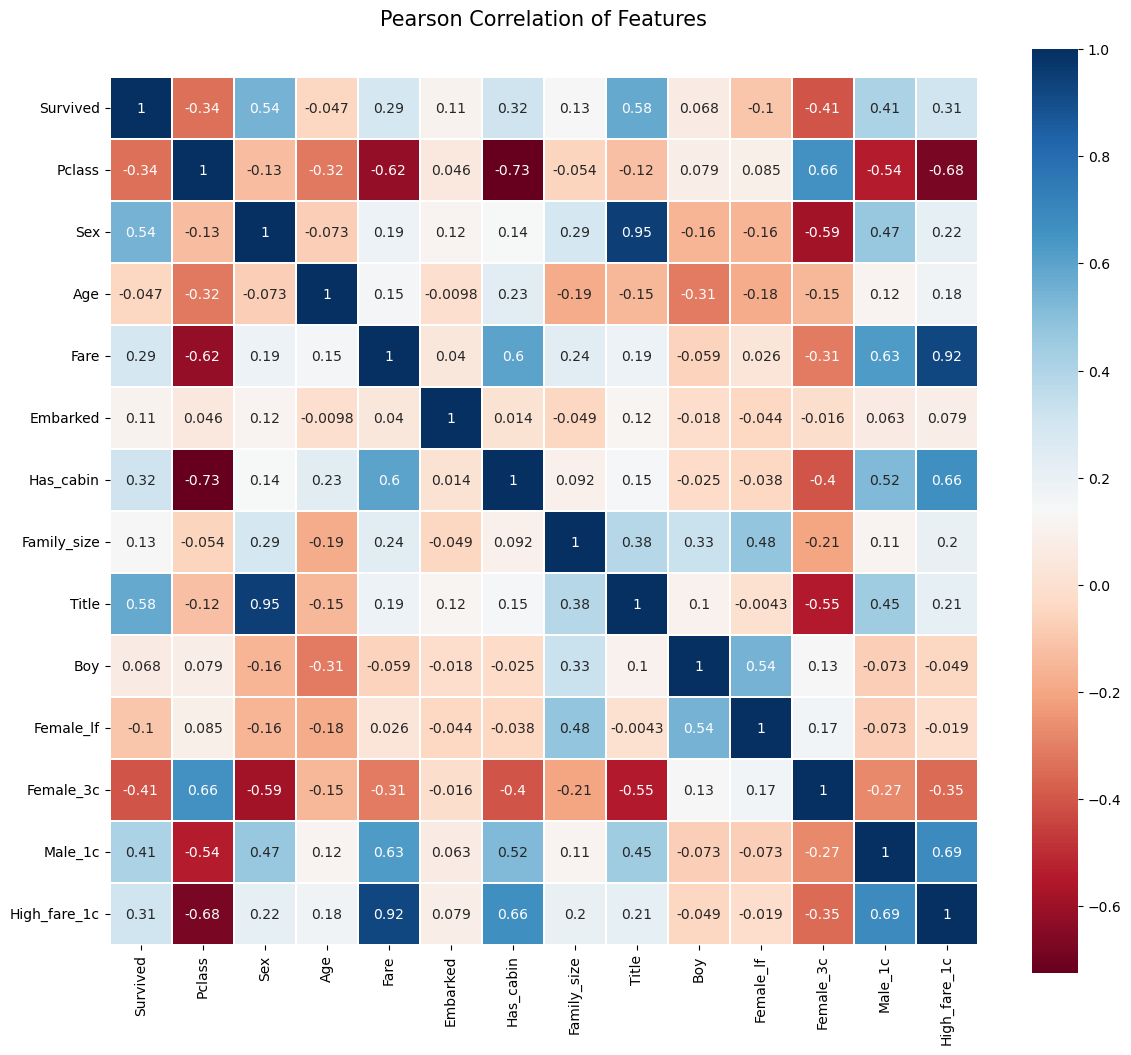

In [64]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_data.astype(float).corr(), linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

From this heatmap, we will consider that features are moderately correlated if their Pearson coefficient is ranged between 0.50 and 0.70 (or -0.70 and -0.50), and strongly correlated if it is under -0.70 or higher than 0.70.

**Strong correlation**
 - Has_cabin/Pclass
 - Title/Sex
 - Fare/High_fare_1c

**Moderate correlation**
 - With target variable : Title (0.58) and Sex (0.54)
 - Pclass/High_fare_1c
 - Pclass/Male_1c
 - Pclass/Female_3c
 - Pclass/Fare
 - Sex/Female_3c
 - Fare/Male_1c
 - Fare/Has_cabin
 - Has_cabin/High_fare_1c
 - Has_cabin/Male_1c
 - Title/Female_3c
 - Boy/Female_lf
 - Male_1c/High_fare_1c

There are 6 features concerned by strong correlations. We will list the number of moderate correlations they have and their correlation score with the target feature to establish which ones are the most useful :
 - Has_cabin : 3, score/target : 0.32
 - Pclass : 4, score/target : -0.34
 - Title : 1, score/target : 0.58
 - Sex : 1, score/target : 0.54
 - Fare : 3, score/target : 0.29
 - High_fare_1c : 3, score/target : 0.31

We will then drop Pclass, Sex and Fare features. We created some features from these 3, and Sex is almost entirely expressed through Title, which gives additionnal information.

Moreover, **Age**, **Family_size** and **Embarked** features do not have any moderated or strong correlation with other features (nor the target feature). We might consider dropping them.

### Pairplots

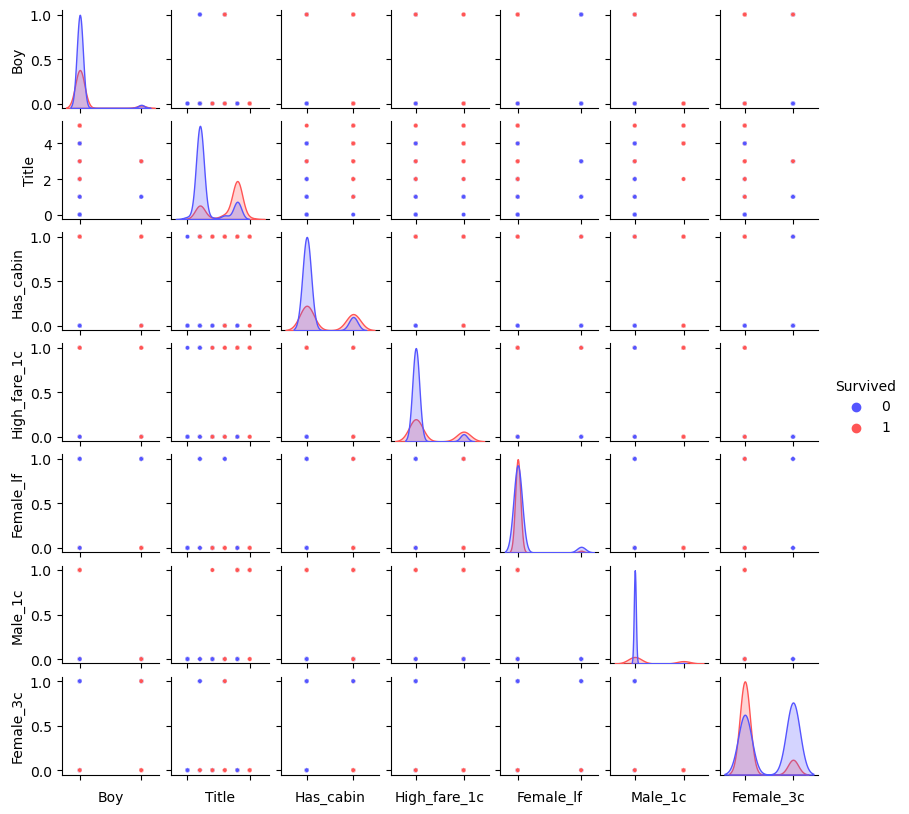

In [65]:
attributes = [u'Survived', u'Boy', u'Title', u'Has_cabin', u'High_fare_1c', u'Female_lf', u'Male_1c', u'Female_3c']
g = sns.pairplot(train_data[attributes],
                 hue='Survived', palette='seismic', height=1.2, diag_kind='kde',
                 diag_kws=dict(shade=True), plot_kws=dict(s=10))
g.set(xticklabels=[])


There are some combinations of features which indicate a high survival rate : they are represented by red dots clusters.

### Conclusion

We will drop the following features :
 - Sex
 - Age
 - Fare
 - Pclass
 - Embarked
 - Family_size

In [66]:
to_drop = ['Age', 'Fare', 'Pclass', 'Embarked', 'Sex', 'Family_size']
train_data = train_data.drop(columns=to_drop)
test_data = test_data.drop(columns=to_drop)
full_data = [train_data, test_data]

In [67]:
train_data.head()

,Survived,Has_cabin,Title,Boy,Female_lf,Female_3c,Male_1c,High_fare_1c
0,0,0,1,0,0,1,0,0
1,1,1,4,0,0,0,1,1
2,1,0,4,0,0,0,0,0
3,1,1,4,0,0,0,1,1
4,0,0,1,0,0,1,0,0


In [68]:
test_data.head()

,Has_cabin,Title,Boy,Female_lf,Female_3c,Male_1c,High_fare_1c
0,0,1,0,0,1,0,0
1,0,4,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0
4,0,4,0,0,0,0,0


## Scaling and Encoding

There is only one non-binary feature : **Title**. We will not one-hot encode it, because there is a certain order among titles, as those corresponding to female passengers have a higher survival rate. Furthermore, no scaling is required since all features are categorical, so that they all belong to the same range.

## Train/test splitting

In [69]:
X = train_data.drop(columns='Survived')
y = train_data['Survived']
print(X.shape, y.shape, test_data.shape)

(891, 7) (891,) (418, 7)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(623, 7) (623,) (268, 7) (268,)


## Model conception

We will try to build several models of different types, then we will investigate further on the ones that perform the best.

### Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
acc_logreg = round(logreg.score(X_test, y_test)*100, 2)
print(acc_logreg)

79.1


In [72]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_logreg))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_logreg), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.74      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              27                   76


### Support Vector Machines (supervised)

In [73]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_test, y_test) * 100, 2)
print(acc_svc)

79.85


In [74]:
print(classification_report(y_test, y_pred_svc))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svc), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       165
           1       0.73      0.75      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  137                   28
Actual: SURVIVED              26                   77


### k-Nearest Neighbors algorithm (k-NN)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=26, metric='minkowski', metric_params=None, 
                           n_jobs=1, n_neighbors=10, p=2, weights='uniform')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_test, y_test)*100, 2)
print(acc_knn)

79.85


In [76]:
print(classification_report(y_test, y_pred_knn))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       165
           1       0.73      0.75      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  137                   28
Actual: SURVIVED              26                   77


### Naive Bayes classifier

In [77]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, y_test)*100, 2)
print(acc_gaussian)

72.76


In [78]:
print(classification_report(y_test, y_pred_gaussian))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_gaussian), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.71      0.93      0.81       165
           1       0.78      0.41      0.54       103

    accuracy                           0.73       268
   macro avg       0.75      0.67      0.67       268
weighted avg       0.74      0.73      0.70       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  153                   12
Actual: SURVIVED              61                   42


### Perceptron

In [79]:
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, y_test)*100, 2)
print(acc_perceptron)

79.1


In [80]:
print(classification_report(y_test, y_pred_perceptron))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_perceptron), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       165
           1       0.70      0.80      0.75       103

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  130                   35
Actual: SURVIVED              21                   82


### Linear Support Vector Classification (SVC)

In [81]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, y_test)*100, 2)
print(acc_linear_svc)

79.1


In [82]:
print(classification_report(y_test, y_pred_linear_svc))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_linear_svc), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.74      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              27                   76


### Stochastic Gradient Descent (SGD)

In [83]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, y_test)*100, 2)
print(acc_sgd)

79.1


In [84]:
print(classification_report(y_test, y_pred_sgd))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_sgd), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.74      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              27                   76


### Decision tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
print(acc_decision_tree)
acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
print(acc_decision_tree_train)

79.48
82.18


In [86]:
print(classification_report(y_test, y_pred_tree))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_tree), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.73      0.75      0.74       103

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              26                   77


### Random Forests

In [87]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)
acc_forest = round(random_forest.score(X_test, y_test) * 100, 2)
print(acc_forest)
acc_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_forest_train)

79.1
82.18


In [88]:
print(classification_report(y_test, y_pred_forest))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_forest), ['Actual: NOT', 'Actual: SURVIVED'], ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.72      0.75      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  135                   30
Actual: SURVIVED              26                   77


### Summary

After having tested out a few models, we compare their scores to pre-select the best ones.

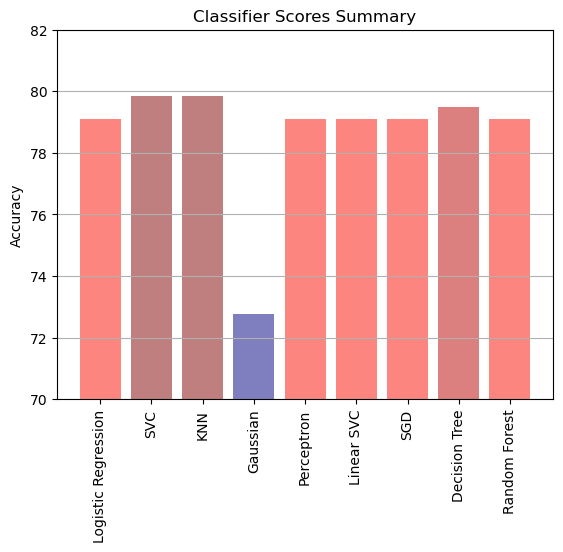

In [89]:
from matplotlib import cm
from matplotlib.colors import Normalize

objects = ('Logistic Regression', 'SVC', 'KNN', 'Gaussian', 'Perceptron', 'Linear SVC', 'SGD', 
           'Decision Tree', 'Random Forest')
x_pos = np.arange(len(objects))
accuracies_test = [acc_logreg, acc_svc, acc_knn, acc_gaussian, acc_perceptron, acc_linear_svc, acc_sgd, 
               acc_decision_tree, acc_forest]
color_map = cm.get_cmap('jet')
norm = Normalize(vmin=min(accuracies_test), vmax=max(accuracies_test))
    
plt.bar(x_pos, accuracies_test, align='center', alpha=0.5, color=color_map(norm(accuracies_test)))
plt.xticks(x_pos, objects, rotation='vertical')
plt.ylabel('Accuracy')
plt.title('Classifier Scores Summary')
plt.ylim(70, 82)
plt.grid(axis='y')
plt.show()

Except the Gaussian classifier, every model gives an accuracy score between 78 and 80.

### Comparison with stratified train/test split

Before pursuing the model selection any further, we want to check whether applying a stratification in our training and test sets could improve the _a priori_ performance of our models.

In [90]:
y_train.sum()/len(y_train)

0.38362760834670945

In [91]:
y_test.sum()/len(y_test)

0.3843283582089552

In fact, our training and test sets are already very equilibrate regarding the survival rate. Thus we don't need to perform the stratification with the current seed.

## Cross-validation

In this problem, we don't have a validation set to measure the performance of our predictors. Thus, we will use cross-validation to simulate a validation set by tanking random samples from the dataset to form the test set, multiple times. We will use the stratified version of this method to keep the class distribution in each fold.

c:\Users\ctesc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


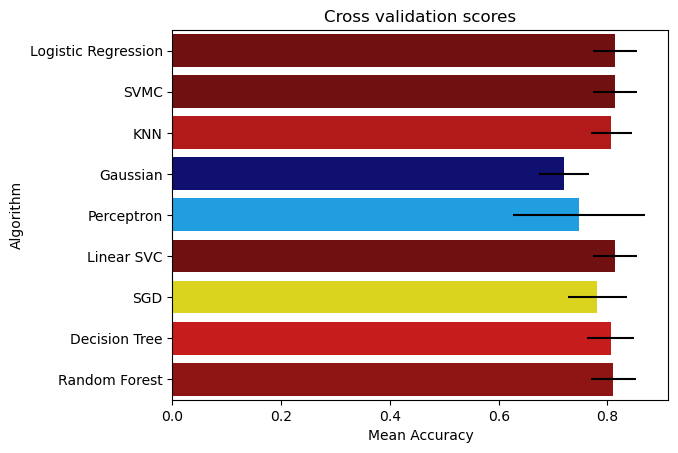

In [92]:
# Cross validate model with Kfold stratified cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms
random_state = 26

classifiers = []
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(GaussianNB())
classifiers.append(Perceptron(random_state=random_state))
classifiers.append(LinearSVC(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train,
                      y=y_train, scoring="accuracy", cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans": cv_means, "CrossValerrors": cv_std,
                       "Algorithm": ['Logistic Regression', 'SVMC',  'KNN',
                                     'Gaussian', 'Perceptron', 'Linear SVC', 'SGD',
                                     'Decision Tree', 'Random Forest']})
color_map = cm.get_cmap('jet')
norm = Normalize(vmin=min(cv_means), vmax=max(cv_means))

g = sns.barplot("CrossValMeans", "Algorithm", data=cv_res,
                palette=color_map(norm(cv_means)), orient="h", **{'xerr': cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


Some of our algorithms exceeds 80% accuracy on average : **Logistic Regression**, **Support Vector Machines**, **K-NN**, **Linear SVC**, **Decision Tree** and **Random Forest**.

We will then fine tune those to maximize their score.

## Fine tuning

### Logistic Regression

**Parameters to fine tune** : 
 - penalty : l1, l2
 - tol : 1e-4
 - C : 1.0
 - max_iter : 100

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.01})


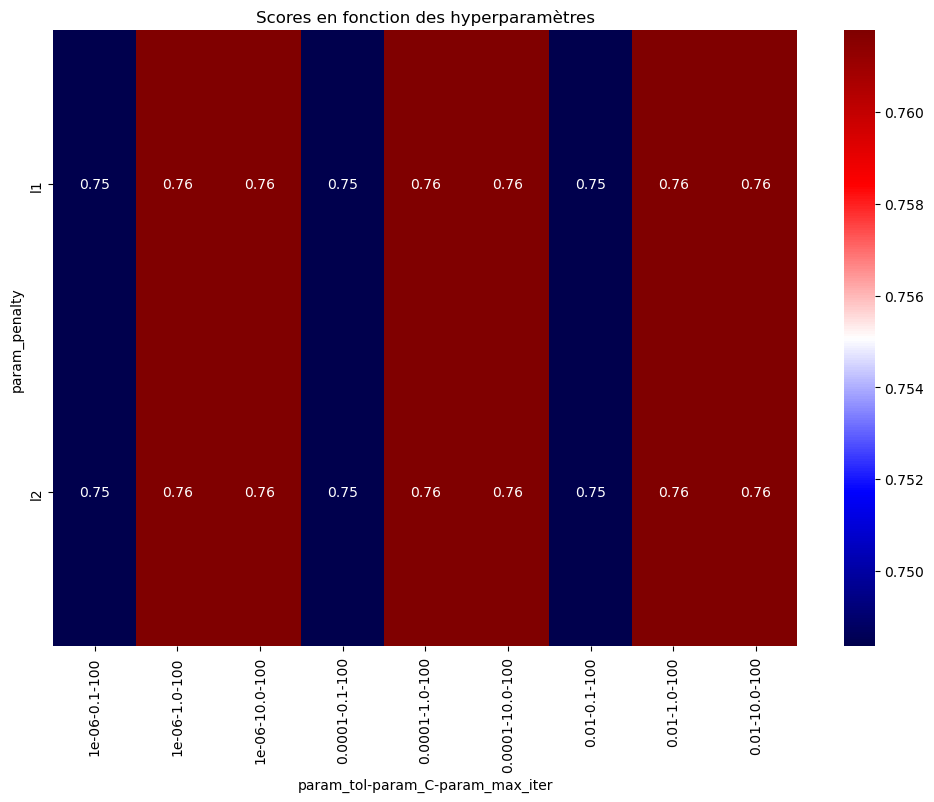

In [93]:
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5)

params = {
    'penalty': ('l1', 'l2'),
    'tol': [1e-2, 1e-4, 1e-6],
    'C': [0.1, 1.0, 10.0],
    'max_iter': [100],
    'solver': ['liblinear']
}

logreg = LogisticRegression(random_state=26)

logreg_cv = GridSearchCV(
    logreg,
    params,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    cv=kfold
)

logreg_cv.fit(X_train, y_train)
results = pd.DataFrame(logreg_cv.cv_results_)
scores = results.pivot_table(index='param_penalty', 
                             columns=['param_tol', 'param_C', 'param_max_iter'], 
                             values='mean_test_score')
best_params = logreg_cv.best_params_
print(f"Best parameters: {best_params})")

plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, cmap='seismic')
plt.title('Scores en fonction des hyperparamètres')
plt.show()


In [94]:
logreg_best = LogisticRegression(**best_params)
logreg_best.fit(X_train, y_train)
y_pred_logreg = logreg_best.predict(X_test)
acc_logreg = round(logreg_best.score(X_test, y_test) * 100, 2)
print(acc_logreg)
acc_logreg_train = round(logreg_best.score(X_train, y_train) * 100, 2)
print(acc_logreg_train)


79.1
81.86


In [95]:
print(classification_report(y_test, y_pred_logreg))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_logreg), ['Actual: NOT', 'Actual: SURVIVED'],
                  ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)


              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.74      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              27                   76


### Support Vector Machines

**Parameters to fine tune** : 
 - kernel : linear, poly, rbf, sigmoid, precomputed
 - degree : 3 (for poly kernel)
 - C : 1.0
 - coef0 : 0 (for poly and sigmoid kernels)
 - tol : 1e-3
 - max_iter

Fitting 5 folds for each of 21 candidates, totalling 105 fits


c:\Users\ctesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=110).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best parameters: {'C': 1.0, 'coef0': 0, 'degree': 3, 'kernel': 'rbf', 'max_iter': 110, 'tol': 0.001})


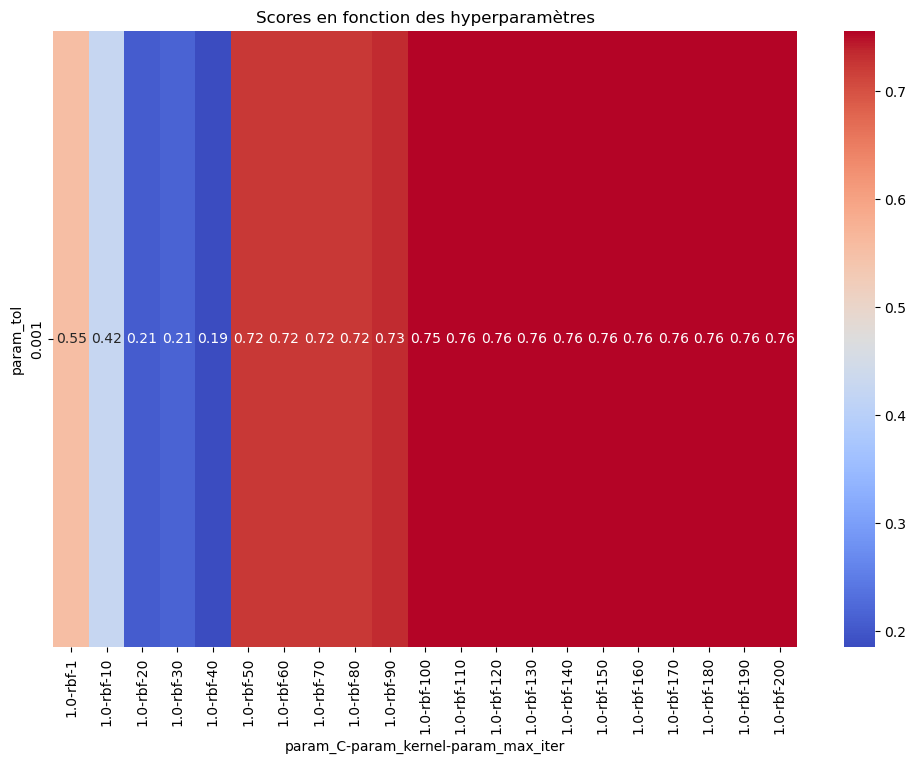

In [96]:
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5)

params = {
    'kernel': ['rbf'],
    'degree': [3],
    'C': [1.0],
    'coef0': [0],
    'tol': [1e-3],
    'max_iter': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
}

svc = SVC(random_state=26)

svc_cv = GridSearchCV(
    svc,
    params,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    cv=kfold
)

svc_cv.fit(X_train, y_train)
results = pd.DataFrame(svc_cv.cv_results_)
scores = results.pivot_table(index='param_tol', 
                             columns=['param_C', 'param_kernel', 'param_max_iter'], 
                             values='mean_test_score')
best_params = svc_cv.best_params_
print(f"Best parameters: {best_params})")

plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, cmap='coolwarm')
plt.title('Scores en fonction des hyperparamètres')
plt.show()


In [97]:
svc_best = SVC(**best_params)
svc_best.fit(X_train, y_train)
y_pred_svc = svc_best.predict(X_test)
acc_svc = round(svc_best.score(X_test, y_test) * 100, 2)
print(acc_svc)
acc_svc_train = round(svc_best.score(X_train, y_train) * 100, 2)
print(acc_svc_train)


77.24
80.74


c:\Users\ctesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=110).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [98]:
print(classification_report(y_test, y_pred_svc))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svc), ['Actual: NOT', 'Actual: SURVIVED'],
                  ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)


              precision    recall  f1-score   support

           0       0.81      0.82      0.82       165
           1       0.71      0.69      0.70       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              32                   71


### K-Nearest Neighbors

**Parameters to fine tune** : 
 - n_neighbors : 5
 - weights : uniform, distance
 - algorithm : auto, ball_tree, kd_tree, brute
 - leaf_size : 30 (for ball_tree and kd_tree)
 - p : 2 (_distance order_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters: {'algorithm': 'brute', 'leaf_size': 5, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'})


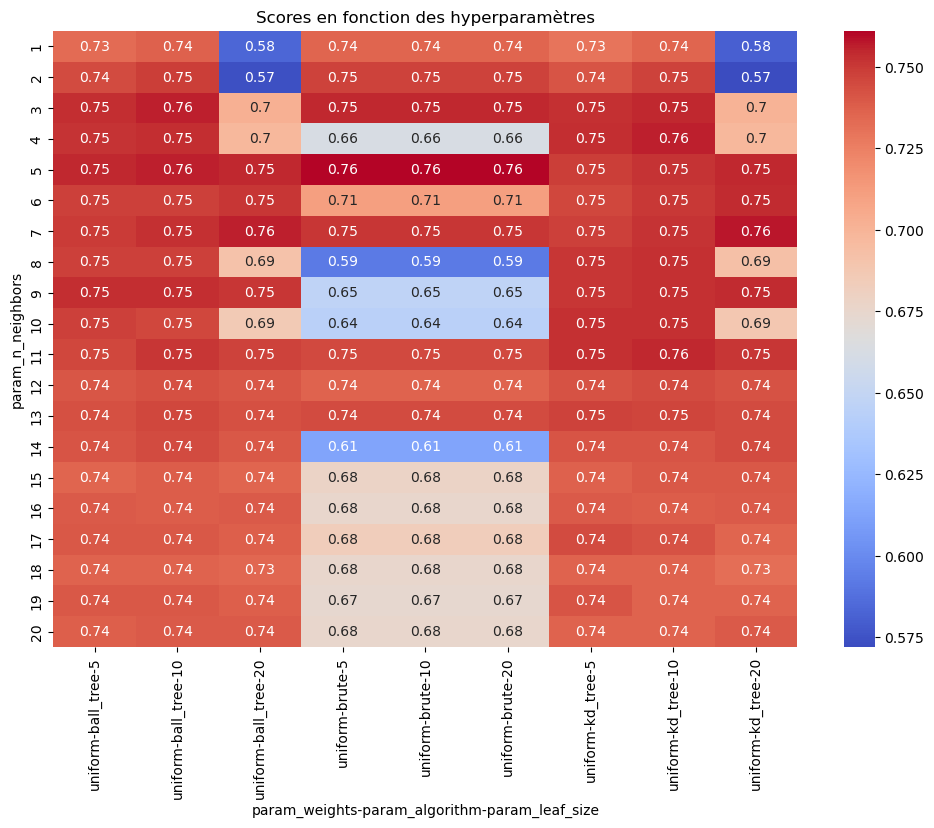

In [99]:
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5)

"""
First parameters grid
"""
params = {
    'n_neighbors': [1, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 60],
    'p': [1, 2, 3],
}

"""
Modified parameters grid
"""

params = {
    'n_neighbors': list(range(1, 21)),
    'weights': ['uniform'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [5, 10, 20],
    'p': [1],
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(
    knn,
    params,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    cv=kfold
)

knn_cv.fit(X_train, y_train)
results = pd.DataFrame(knn_cv.cv_results_)
scores = results.pivot_table(index='param_n_neighbors', 
                             columns=['param_weights', 'param_algorithm', 'param_leaf_size'], 
                             values='mean_test_score')
best_params = knn_cv.best_params_
print(f"Best parameters: {best_params})")

plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, cmap='coolwarm')
plt.title('Scores en fonction des hyperparamètres')
plt.show()


In [100]:
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
acc_knn = round(knn_best.score(X_test, y_test) * 100, 2)
print(acc_knn)
acc_knn_train = round(knn_best.score(X_train, y_train) * 100, 2)
print(acc_knn_train)


79.48
80.26


In [101]:
print(classification_report(y_test, y_pred_knn))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), ['Actual: NOT', 'Actual: SURVIVED'],
                  ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)


              precision    recall  f1-score   support

           0       0.86      0.79      0.83       165
           1       0.71      0.80      0.75       103

    accuracy                           0.79       268
   macro avg       0.78      0.80      0.79       268
weighted avg       0.80      0.79      0.80       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  131                   34
Actual: SURVIVED              21                   82


### Linear SVC

**Parameters to fine tune** : 
 - penalty : l1, l2
 - loss : hinge, squared_hinge
 - dual : True, False (prefer False)
 - tol : 1e-4
 - C : 1.0
 - max_iter : 1000

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters: {'C': 1.0, 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001})


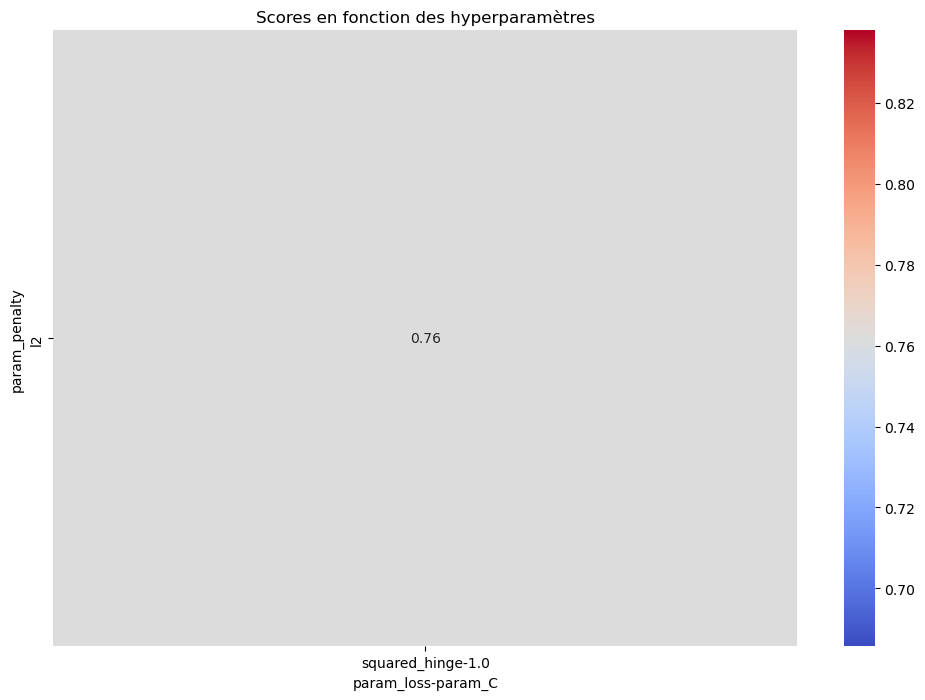

In [102]:
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5)

"""
First parameters grid
"""
params = {
    'penalty': ['l1', 'l2'],
    'loss': ['hinge', 'squared_hinge'],
    'tol': [1e-6, 1e-4, 1e-2],
    'C': [0.1, 1.0, 10.0],
    'max_iter': [100, 1000, 10000],
}

"""
Modified parameters grid
"""

params = {
    'penalty': ['l2'],
    'loss': ['squared_hinge'],
    'tol': [1e-4],
    'C': [1.0],
    'max_iter': [100],
}

linear_svc = LinearSVC(dual=False, random_state=26)

linear_svc_cv = GridSearchCV(
    linear_svc,
    params,
    scoring='f1',
    n_jobs=-1,
    verbose=3,
    cv=kfold
)

linear_svc_cv.fit(X_train, y_train)
results = pd.DataFrame(linear_svc_cv.cv_results_)
scores = results.pivot_table(index='param_penalty', 
                             columns=['param_loss', 'param_C'], 
                             values='mean_test_score')
best_params = linear_svc_cv.best_params_
print(f"Best parameters: {best_params})")

plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, cmap='coolwarm')
plt.title('Scores en fonction des hyperparamètres')
plt.show()


In [103]:
linear_svc_best = LinearSVC(**best_params)
linear_svc_best.fit(X_train, y_train)
y_pred_linear_svc = linear_svc_best.predict(X_test)
acc_linear_svc = round(linear_svc_best.score(X_test, y_test) * 100, 2)
print(acc_linear_svc)
acc_linear_svc_train = round(linear_svc_best.score(X_train, y_train) * 100, 2)
print(acc_linear_svc_train)


79.1
81.86


c:\Users\ctesc\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [104]:
print(classification_report(y_test, y_pred_linear_svc))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_linear_svc), ['Actual: NOT', 'Actual: SURVIVED'],
                  ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)


              precision    recall  f1-score   support

           0       0.83      0.82      0.83       165
           1       0.72      0.74      0.73       103

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              27                   76


### Decision Tree

**Parameters to fine tune** : 
 - criterion : gini, entropy, log_loss
 - splitter : best, random
 - max_depth
 - max_samples_split
 - min_samples_leaf

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


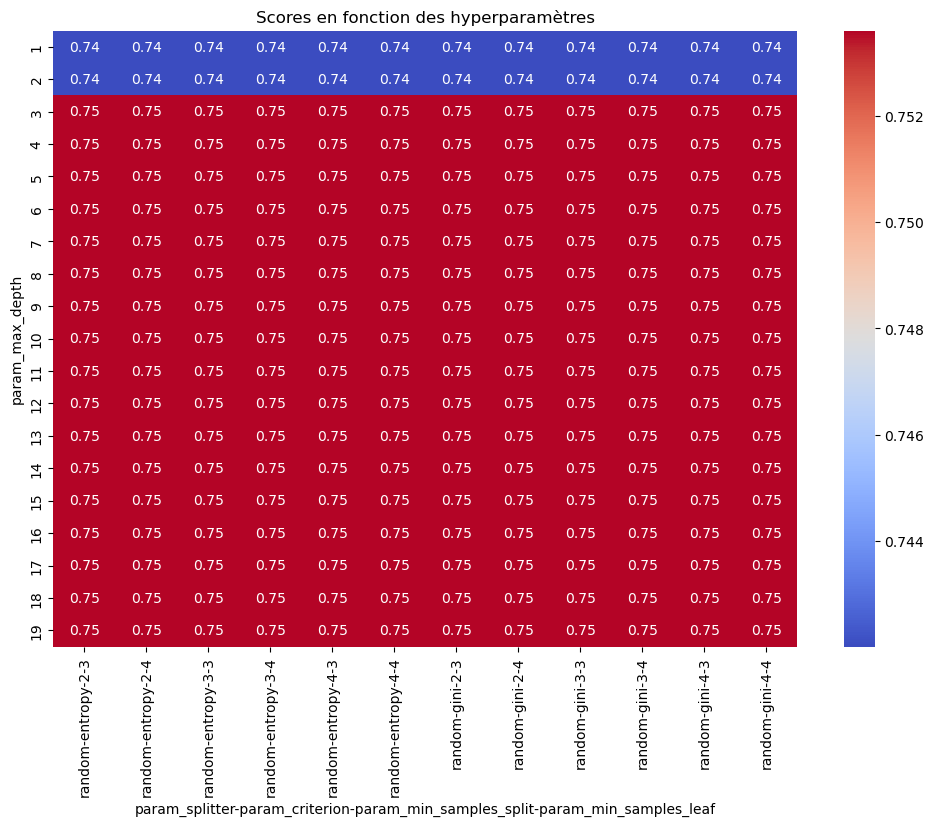

Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})


In [105]:
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5)

params = {
    "criterion": ("gini", "entropy"),
    "splitter": ["random"],
    "max_depth": list(range(1, 20)),
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": list(range(3, 5)),
}

tree = DecisionTreeClassifier(random_state=26)

tree_cv = GridSearchCV(
    tree,
    params,
    scoring='f1',
    n_jobs=-1,
    verbose=1,
    cv=kfold
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
results = pd.DataFrame(tree_cv.cv_results_)
scores = results.pivot_table(index='param_max_depth',
                             columns=['param_splitter', 'param_criterion', 'param_min_samples_split',
                                      'param_min_samples_leaf'],
                             values='mean_test_score')
best_params = tree_cv.best_params_


plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, cmap='coolwarm')
plt.title('Scores en fonction des hyperparamètres')
plt.show()
print(f"Best parameters: {best_params})")


In [106]:
tree_best = DecisionTreeClassifier(**best_params)
tree_best.fit(X_train, y_train)
y_pred_tree = tree_best.predict(X_test)
acc_decision_tree = round(tree_best.score(X_test, y_test) * 100, 2)
print(acc_decision_tree)
acc_decision_tree_train = round(tree_best.score(X_train, y_train) * 100, 2)
print(acc_decision_tree_train)


79.85
81.38


In [107]:
print(classification_report(y_test, y_pred_tree))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_tree), ['Actual: NOT', 'Actual: SURVIVED'],
                  ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)


              precision    recall  f1-score   support

           0       0.84      0.83      0.84       165
           1       0.73      0.75      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  137                   28
Actual: SURVIVED              26                   77


### Random Forest

**Parameters to fine tune** : 
 - n_estimators
 - max_features
 - max_depth
 - max_samples_split
 - min_samples_leaf
 - bootstrap : True, False

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\ctesc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 27 is smaller than n_iter=200. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


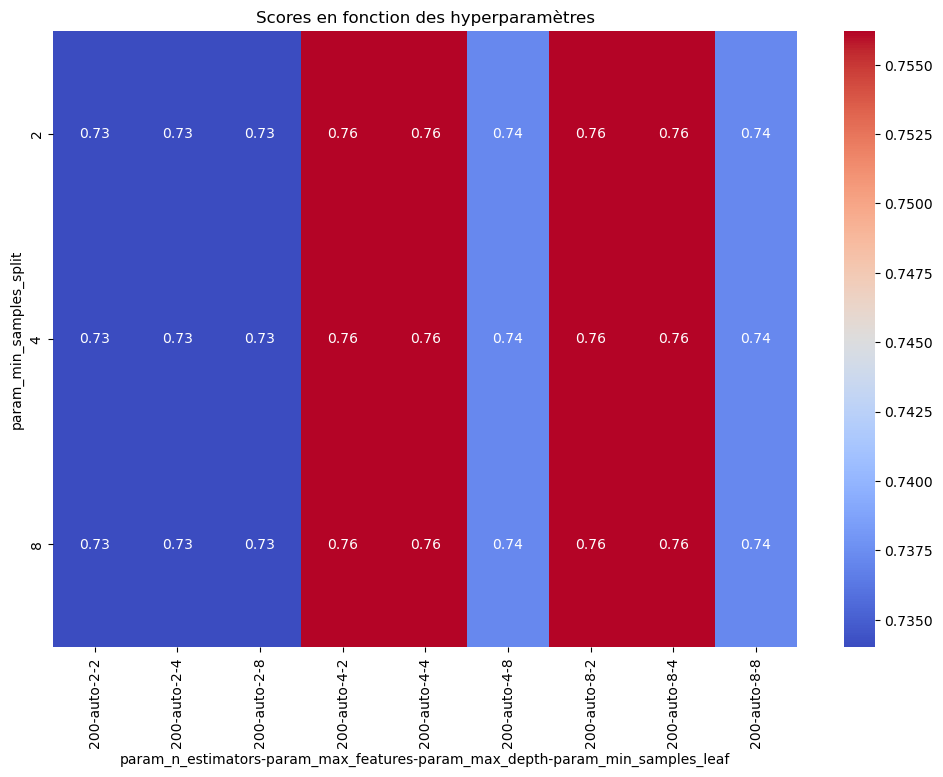

Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': False})


In [108]:
from sklearn.model_selection import RandomizedSearchCV 

kfold = StratifiedKFold(n_splits=5)

n_estimators = [200]
max_features = ['auto']
max_depth = [2, 4, 8]
#max_depth.append(None)
min_samples_split = [2, 4, 8]
min_samples_leaf = [2, 4, 8]
bootstrap = [False]

params = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

forest = RandomForestClassifier(random_state=26)

forest_cv = RandomizedSearchCV(
    estimator = forest,
    param_distributions = params,
    scoring='f1',
    n_iter=200,
    n_jobs=-1,
    verbose=1,
    cv=kfold,
    random_state=26
)

forest_cv.fit(X_train, y_train)
best_params = forest_cv.best_params_
results = pd.DataFrame(forest_cv.cv_results_)
scores = results.pivot_table(index='param_min_samples_split',
                             columns=['param_n_estimators', 'param_max_features', 'param_max_depth',
                                      'param_min_samples_leaf'],
                             values='mean_test_score')

plt.figure(figsize=(12, 8))
sns.heatmap(scores, annot=True, cmap='coolwarm')
plt.title('Scores en fonction des hyperparamètres')
plt.show()
print(f"Best parameters: {best_params})")

In [109]:
forest_best = RandomForestClassifier(**best_params)
forest_best.fit(X_train, y_train)
y_pred_forest = forest_best.predict(X_test)
acc_random_forest = round(forest_best.score(X_test, y_test) * 100, 2)
print(acc_random_forest)
acc_random_forest_train = round(forest_best.score(X_train, y_train) * 100, 2)
print(acc_random_forest_train)


79.48
82.18


In [110]:
print(classification_report(y_test, y_pred_forest))
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_forest), ['Actual: NOT', 'Actual: SURVIVED'],
                  ['Predicted: NOT', 'Predicted: SURVIVED'])
print(cm)


              precision    recall  f1-score   support

           0       0.84      0.82      0.83       165
           1       0.73      0.75      0.74       103

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268

                  Predicted: NOT  Predicted: SURVIVED
Actual: NOT                  136                   29
Actual: SURVIVED              26                   77


### Summary

In [111]:
print(f'Logistic regression accuracy : {acc_logreg}')
print(f'SVM accuracy : {acc_svc}')
print(f'KNN accuracy : {acc_knn}')
print(f'Linear SVC accuracy : {acc_linear_svc}')
print(f'Decision tree accuracy : {acc_decision_tree}')
print(f'Random forest accuracy : {acc_forest}')

Logistic regression accuracy : 79.1
SVM accuracy : 77.24
KNN accuracy : 79.48
Linear SVC accuracy : 79.1
Decision tree accuracy : 79.85
Random forest accuracy : 79.1


The best models are K-Nearest neighbors and Random Forest. We will first create a submission file with the predictions based on KNN, then based on Random Forest.

## Submission

In [151]:
submission_knn = pd.concat([pass_id, pd.Series(knn_best.predict(test_data), name='Survived'), ], axis=1) 
submission_knn.to_csv(os.path.join(OUTPUT_PATH, 'submission_knn.csv'), index=False)

In [128]:
submit_predictions(file='submission_knn.csv')

100%|██████████| 3.18k/3.18k [00:02<00:00, 1.38kB/s]


In [152]:
submission_forest = pd.concat([pass_id, pd.Series(forest_best.predict(test_data), name='Survived'), ], axis=1) 
submission_forest.to_csv(os.path.join(OUTPUT_PATH, 'submission_forest.csv'), index=False)

In [130]:
submit_predictions(file='submission_forest.csv')

100%|██████████| 3.18k/3.18k [00:01<00:00, 1.95kB/s]


In [172]:
check_predictions()

Submission of the file submission_tree.csv scored 0.76555
Submission of the file submission_tree.csv scored 0.76555
Submission of the file submission_linear_svc.csv scored 0.77033
Submission of the file submission_linear_svc.csv scored 0.77511
Submission of the file submission_linear_svc.csv scored 0.77511
Submission of the file submission_svc.csv scored 0.77511
Submission of the file submission_logreg.csv scored 0.77272
Submission of the file submission_forest.csv scored 0.77033
Submission of the file submission_knn.csv scored 0.72488


The random forest predictions have performed significantly better than the knn predictions, even though they had similar scores in the **Fine tuning** section. Thus, we believe that we should also submit predictions with the four other models.

In [154]:
submission_logreg = pd.concat([pass_id, pd.Series(logreg_best.predict(test_data), name='Survived'), ], axis=1) 
submission_logreg.to_csv(os.path.join(OUTPUT_PATH, 'submission_logreg.csv'), index=False)

In [155]:
submit_predictions(file='submission_logreg.csv')

100%|██████████| 3.18k/3.18k [00:01<00:00, 2.02kB/s]


In [157]:
submission_svc = pd.concat([pass_id, pd.Series(svc_best.predict(test_data), name='Survived'), ], axis=1) 
submission_svc.to_csv(os.path.join(OUTPUT_PATH, 'submission_svc.csv'), index=False)

In [158]:
submit_predictions(file='submission_svc.csv')

100%|██████████| 3.18k/3.18k [00:01<00:00, 1.86kB/s]


In [165]:
submission_linear_svc = pd.concat([pass_id, pd.Series(linear_svc_best.predict(test_data), name='Survived'), ], axis=1) 
submission_linear_svc.to_csv(os.path.join(OUTPUT_PATH, 'submission_linear_svc.csv'), index=False)

In [166]:
submit_predictions(file='submission_linear_svc.csv')

100%|██████████| 3.18k/3.18k [00:01<00:00, 1.82kB/s]


In [168]:
submission_tree = pd.concat([pass_id, pd.Series(tree_best.predict(test_data), name='Survived'), ], axis=1) 
submission_tree.to_csv(os.path.join(OUTPUT_PATH, 'submission_tree.csv'), index=False)

In [171]:
submit_predictions(file='submission_tree.csv')

100%|██████████| 3.18k/3.18k [00:02<00:00, 1.58kB/s]
